1st file contains detailed analysis (EDA) on application_data to identify the important features which help us to identify the defaulters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

In [4]:
application_data = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')
columns_description = pd.read_csv('columns_description.csv',skiprows=1)

In [5]:
application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

In [6]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
combined_df= pd.merge(application_data, previous_application, on='SK_ID_CURR', how='inner')

combined_df.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)
display(combined_df.head(10))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,

In [7]:
combined_df.drop_duplicates(subset='SK_ID_CURR',inplace=True,keep='last')
combined_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2827850,Revolving l

# Converting negative values to absolute values

In [8]:
combined_df['DAYS_BIRTH'] = abs(combined_df['DAYS_BIRTH'])
combined_df['DAYS_ID_PUBLISH'] = abs(combined_df['DAYS_ID_PUBLISH'])
combined_df['DAYS_ID_PUBLISH'] = abs(combined_df['DAYS_ID_PUBLISH'])
combined_df['DAYS_LAST_PHONE_CHANGE'] = abs(combined_df['DAYS_LAST_PHONE_CHANGE'])


# Corelation between variables

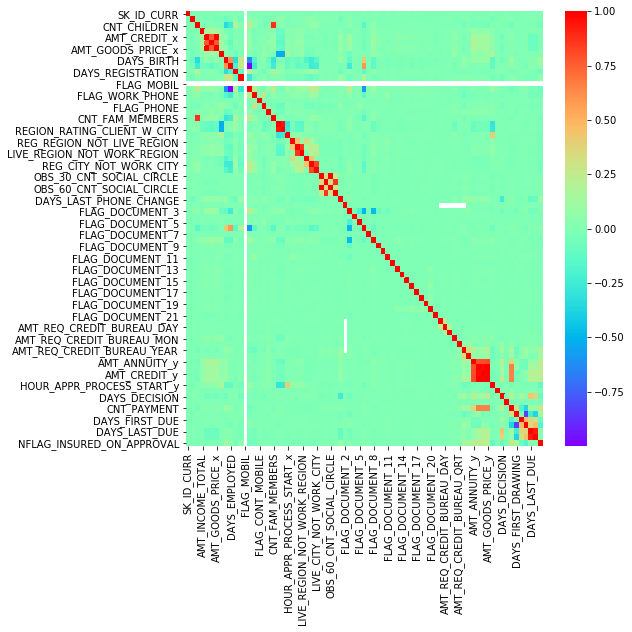

In [9]:
corrmat = combined_df.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

## Top 10 Correlation Fields 

In [10]:
corrmat = combined_df.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
2278,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
4786,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.00
984,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
4787,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99
454,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.99
4711,AMT_CREDIT_y,AMT_APPLICATION,0.97
1519,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
5547,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
1352,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1823,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.87




## Imbalance percentage

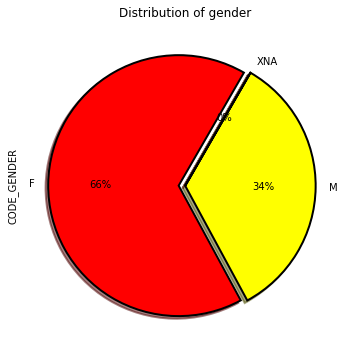

In [11]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
combined_df["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

### Point to infer from the graph
It's non balanced data


## Distribution of Target variable

TARGET :Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)


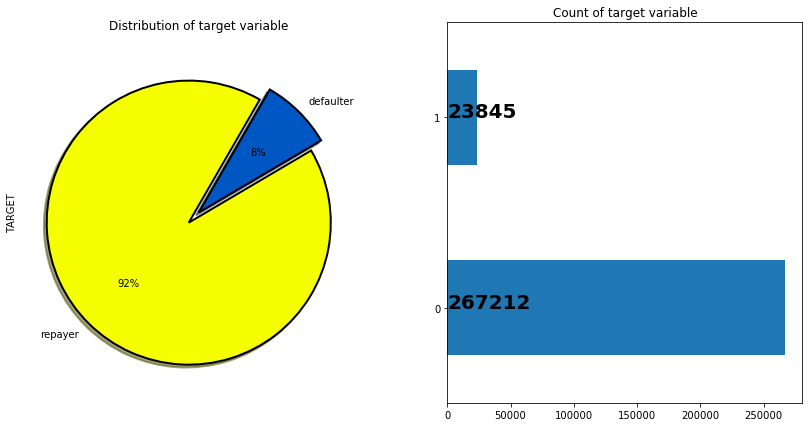

In [12]:
plt.figure(figsize=(14,7))
plt.subplot(121)
combined_df["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = combined_df["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(combined_df["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

### Point to infer from the graph
8% out of total client population have difficulties in repaying loans.

## Distribution in Contract types 

NAME_CONTRACT_TYPE : Identification if loan is cash , consumer or revolving

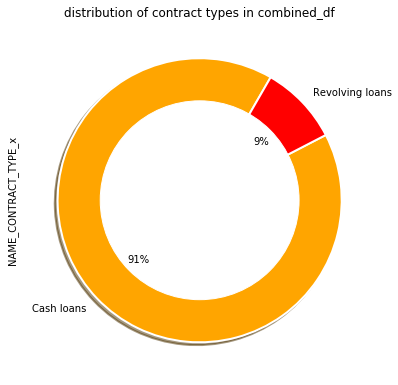

In [13]:
plt.figure(figsize=(14,7))
plt.subplot(121)
combined_df["NAME_CONTRACT_TYPE_x"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in combined_df")

plt.show()

### Point to infer from the graph

The percentage of revolving loans and cash loans are 9% & 91%.



## Gender Distribution

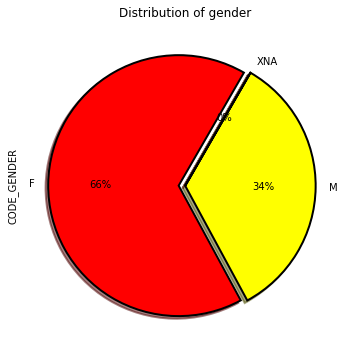

In [14]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
combined_df["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

### Point to infer from the graph

Female : 66% 

Male : 34% 

## Distribution of Contract type by gender

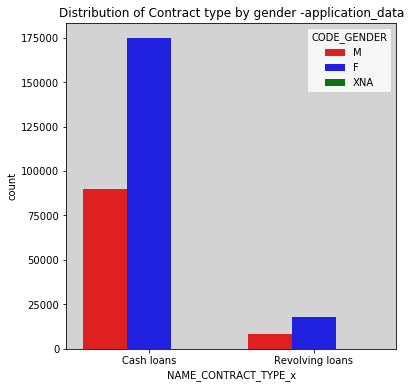

In [15]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot("NAME_CONTRACT_TYPE_x",hue="CODE_GENDER",data=combined_df,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender -application_data")


plt.show()


### Point to infer from the graph

Cash loans is always prefered over Revolving loans by both genders

## Distribution of client owning a car and by gender

FLAG_OWN_CAR Flag if the client owns a car .

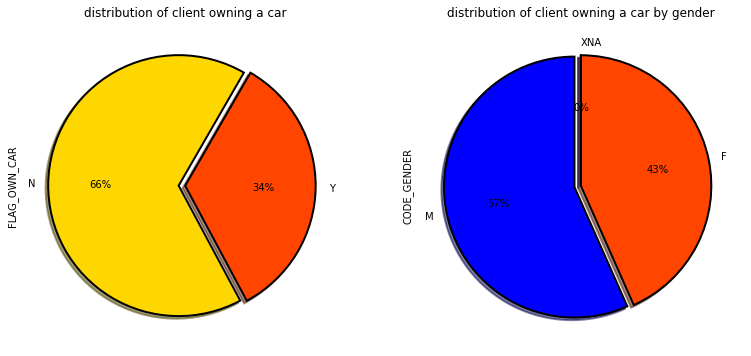

In [16]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
combined_df["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
combined_df[combined_df["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

### Point to infer from the graph

SUBPLOT 1 : Distribution of client owning a car. 34% of clients own a car .

SUBPLOT 2 : Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.

## Distribution of client owning a house or flat and by gender

FLAG_OWN_REALTY - Flag if client owns a house or flat

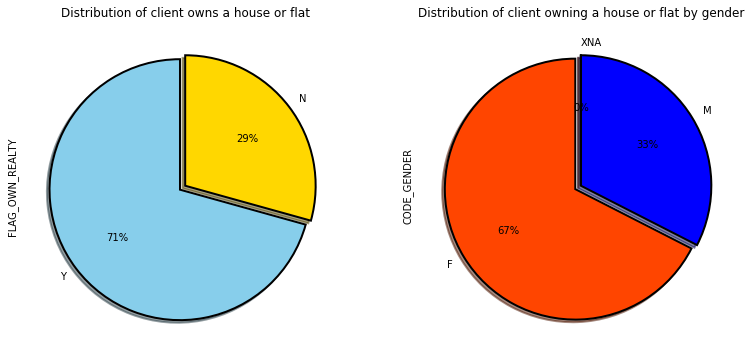

In [17]:
plt.figure(figsize=(13,6))
plt.subplot(121)
combined_df["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
combined_df[combined_df["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

### Point to infer from the graph

SUBPLOT 1 : Distribution of client owning a house or flat . 71% of clients own a flat or house .

SUBPLOT 2 : Distribution of client owning a house or flat by gender . Out of total clients who own house 67% are female and 33% are male.

## Distribution of Number of children and family members of client by repayment status.

CNT_CHILDREN - Number of children the client has.

CNT_FAM_MEMBERS - How many family members does client have.

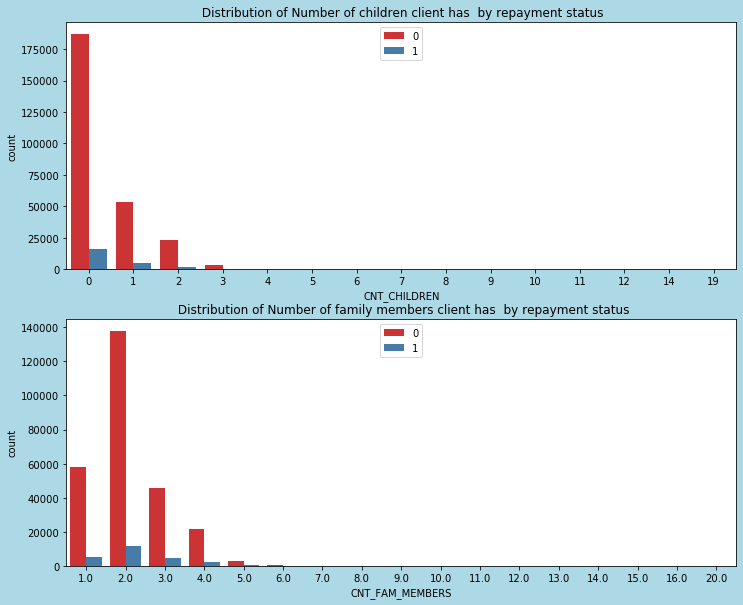

In [18]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(combined_df["CNT_CHILDREN"],palette="Set1",hue=combined_df["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")
plt.subplot(212)
sns.countplot(combined_df["CNT_FAM_MEMBERS"],palette="Set1",hue=combined_df["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")
fig.set_facecolor("lightblue")


## Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)

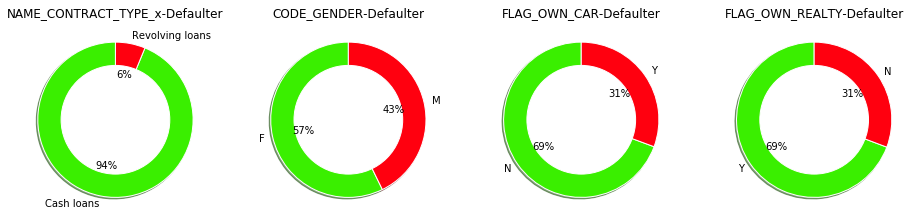

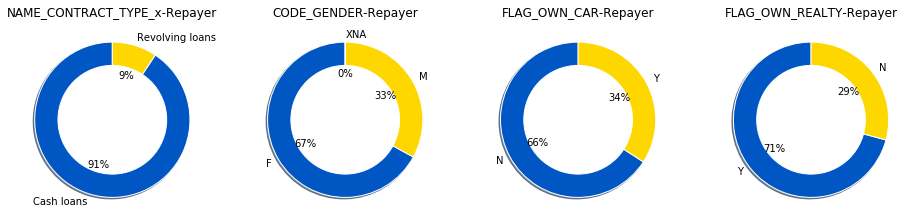

In [19]:
default = combined_df[combined_df["TARGET"]==1][[ 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = combined_df[combined_df["TARGET"]==0][[ 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE_x', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")

### Point to infer from the graph

Percentage of males is 10% more in defaults than non defaulters.

Percentage of Cash Loans is 3% more in defaults than Revolving Loans.

### Distribution of amount data

AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

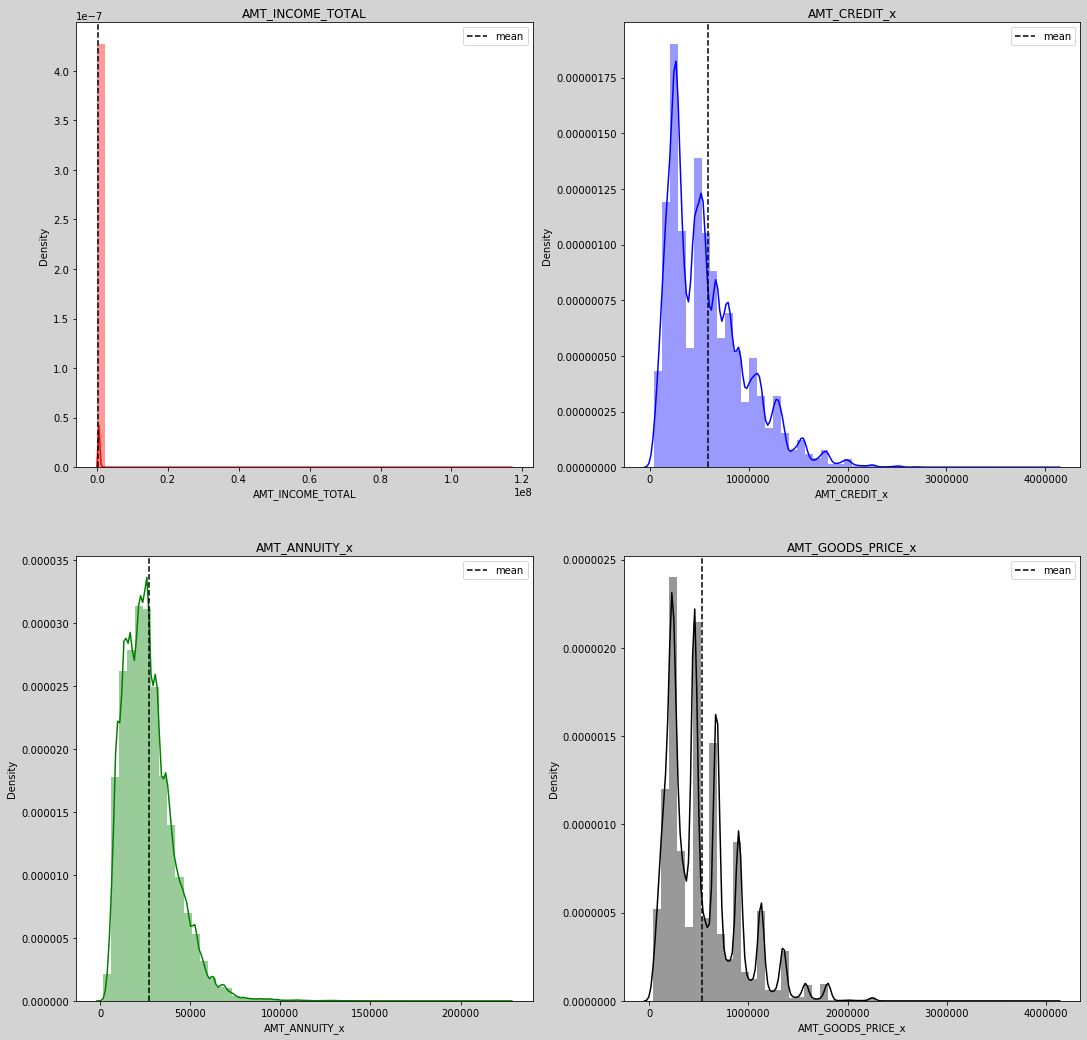

In [20]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x','AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(18,18))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(combined_df[combined_df[i].notnull()][i],color=k)
    plt.axvline(combined_df[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)


## Comparing summary statistics between defaulters and non - defaulters for loan amounts.



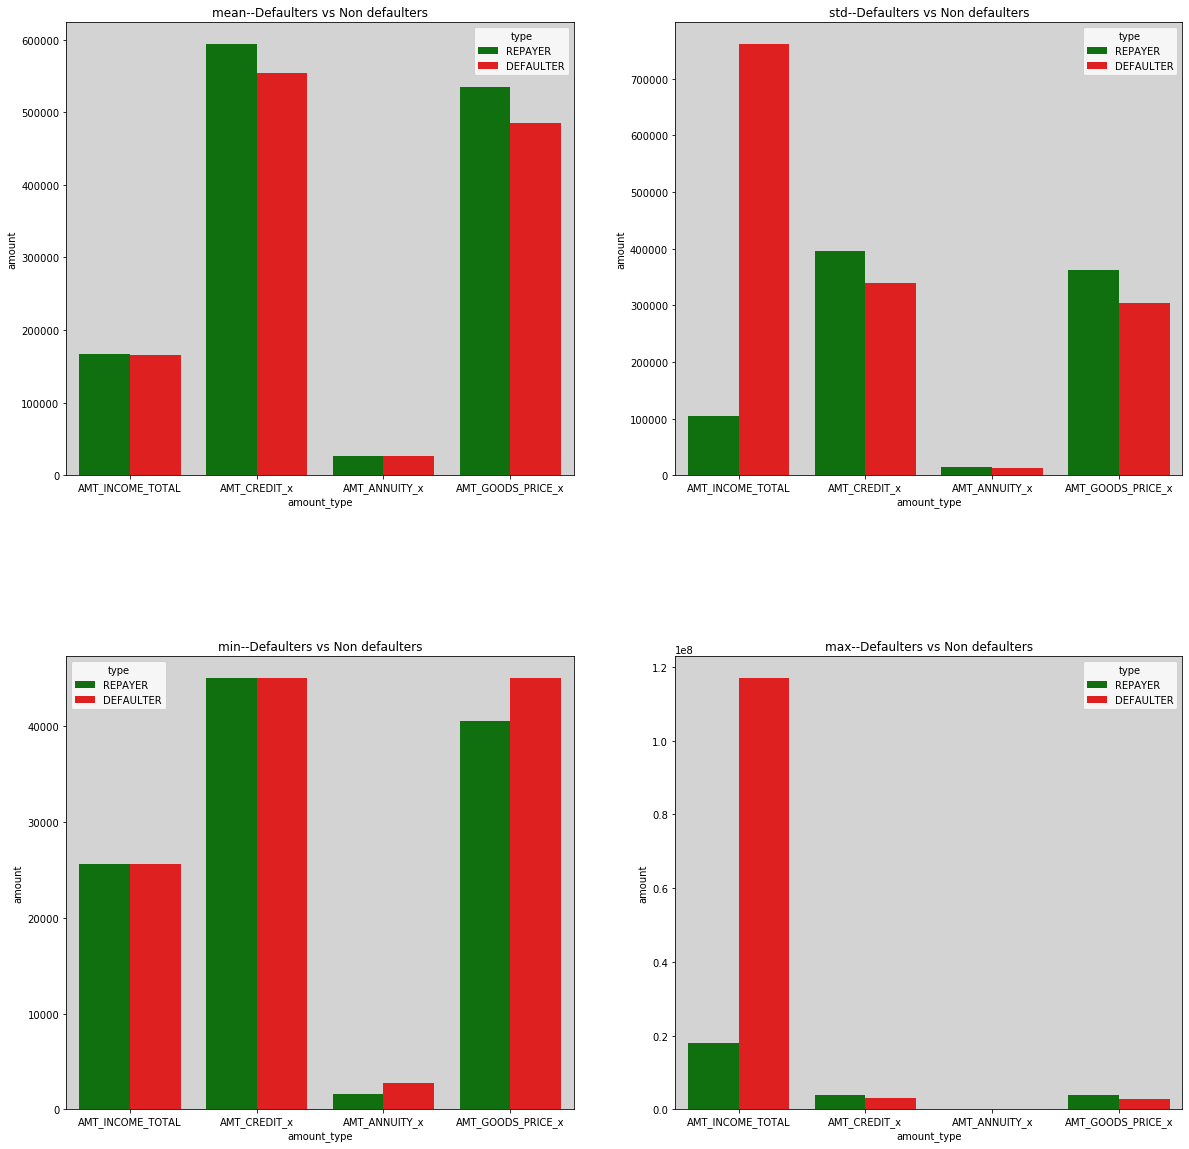

In [21]:
df = combined_df.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(20,20))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    fig.set_facecolor("lightgrey")

### Point to infer from the graph

#### Income of client -

1 . Average income of clients who default and who do not are almost same.

2 . Standard deviation in income of client who default is very high compared to who do not default.

3 . Clients who default also has maximum income earnings

#### Credit amount of the loan ,Loan annuity,Amount goods price -

1 . Statistics between credit amounts,Loan annuity and Amount goods price given to cilents who default and who dont are almost similar.

## Average Income,credit,annuity & goods_price by gender

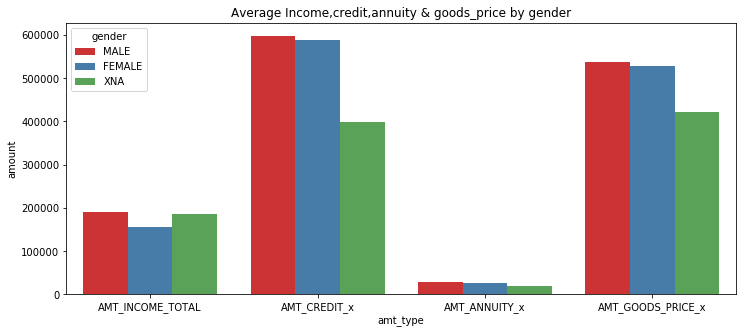

In [22]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x','AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']

df1 = combined_df.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

plt.figure(figsize=(12,5))
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set1")
plt.title("Average Income,credit,annuity & goods_price by gender")
plt.show()

## Scatter plot between credit amount and annuity amount

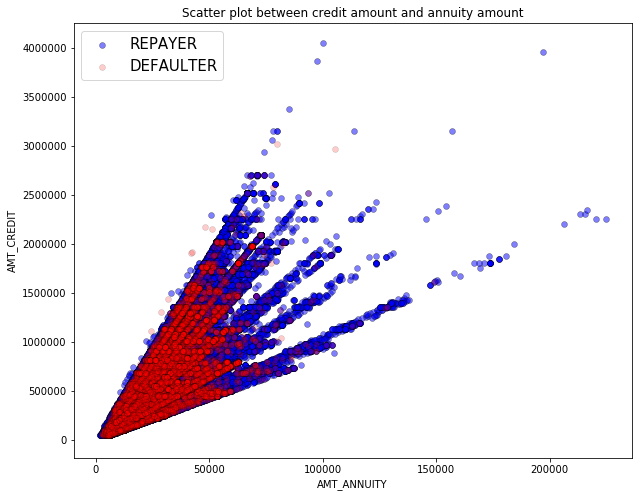

In [23]:
fig = plt.figure(figsize=(10,8))
plt.scatter(combined_df[combined_df["TARGET"]==0]['AMT_ANNUITY_x'],combined_df[combined_df["TARGET"]==0]['AMT_CREDIT_x'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(combined_df[combined_df["TARGET"]==1]['AMT_ANNUITY_x'],combined_df[combined_df["TARGET"]==1]['AMT_CREDIT_x'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

## Pair Plot between amount variables

AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

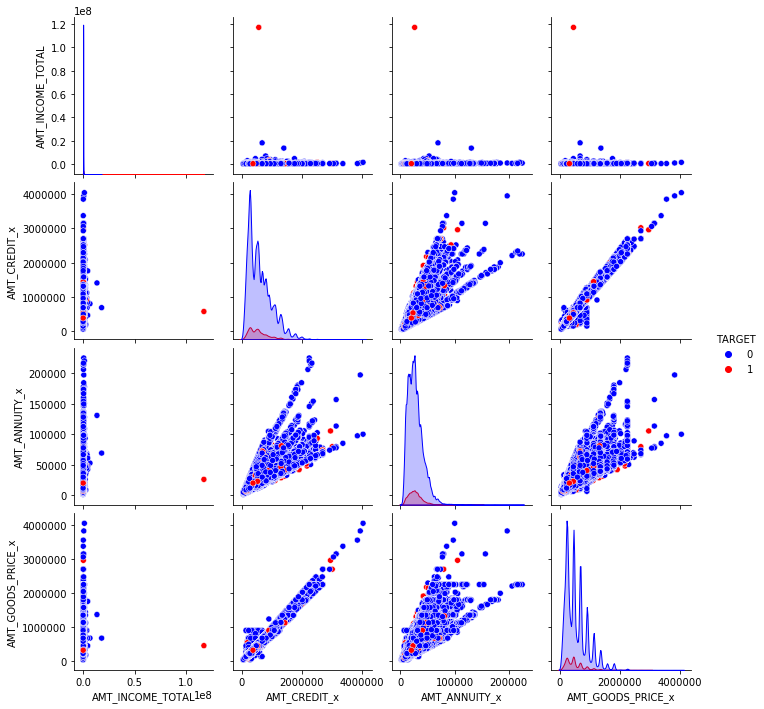

In [24]:
amt = combined_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT_x',
                         'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE_x"].notnull()) & (amt["AMT_ANNUITY_x"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()

# Distribution of Suite type

NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan.

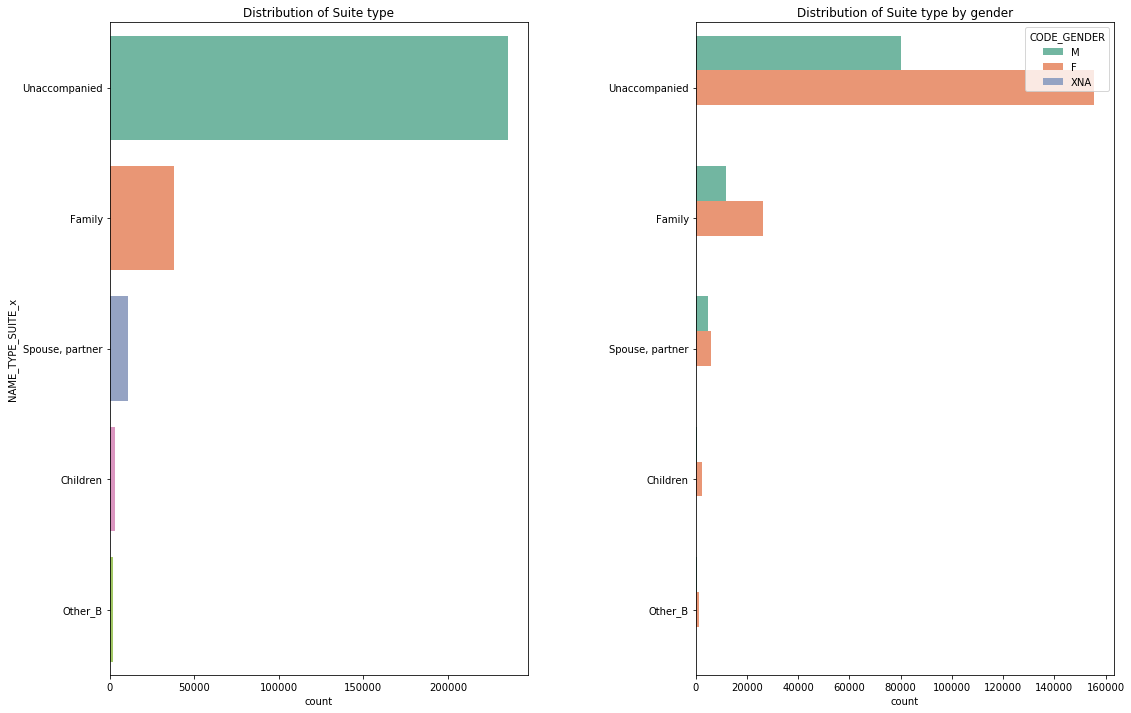

In [25]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=combined_df["NAME_TYPE_SUITE_x"],
              palette="Set2",
              order=combined_df["NAME_TYPE_SUITE_x"].value_counts().index[:5])
plt.title("Distribution of Suite type")

plt.subplot(122)
sns.countplot(y=combined_df["NAME_TYPE_SUITE_x"],
              hue=combined_df["CODE_GENDER"],palette="Set2",
              order=combined_df["NAME_TYPE_SUITE_x"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)

### Distribution of client income type

NAME_INCOME_TYPE Clients income type (businessman, working, maternity leave,…)

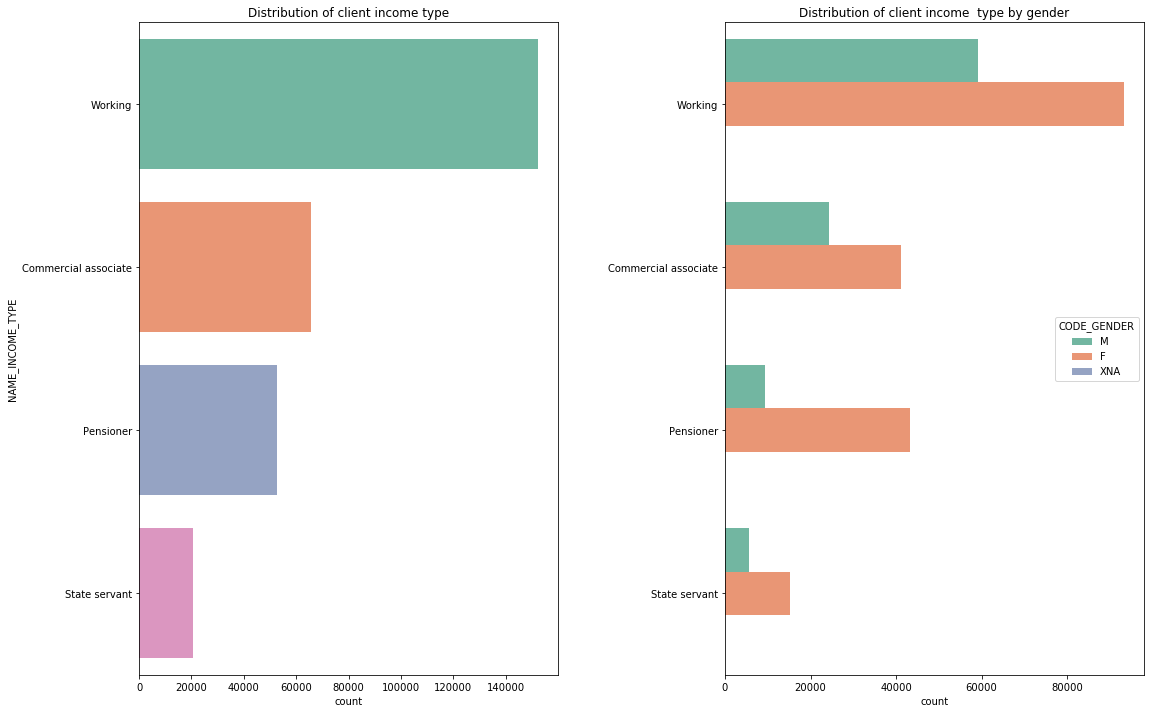

In [26]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=combined_df["NAME_INCOME_TYPE"],
              palette="Set2",
              order=combined_df["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=combined_df["NAME_INCOME_TYPE"],
              hue=combined_df["CODE_GENDER"],
              palette="Set2",
              order=combined_df["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)


### Distribution of Education type by loan repayment status

NAME_EDUCATION_TYPE Level of highest education the client achieved..

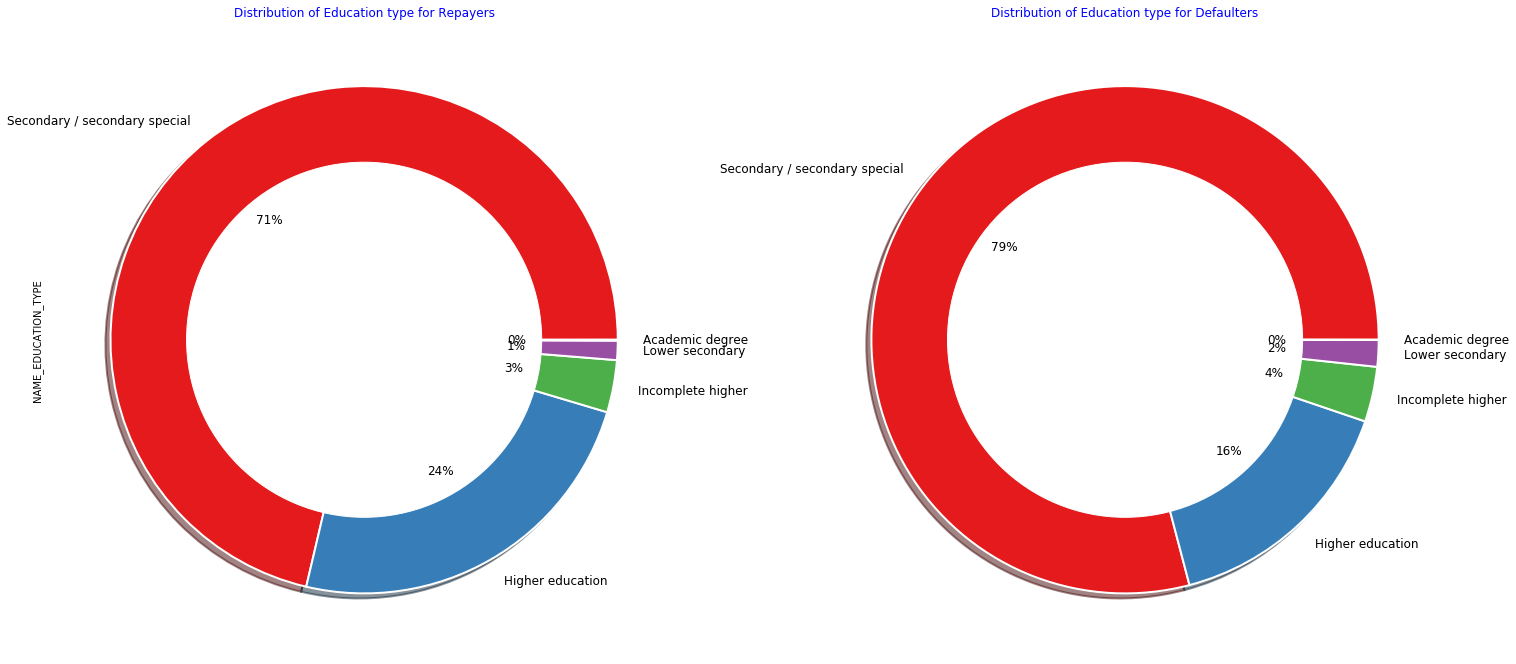

In [27]:
plt.figure(figsize=(25,25))
plt.subplot(121)
combined_df[combined_df["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
combined_df[combined_df["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

### Point to infer from the graph

Clients who default have proportionally 8% less higher education compared to clients who do not default.

### Average Earnings by different professions and education types

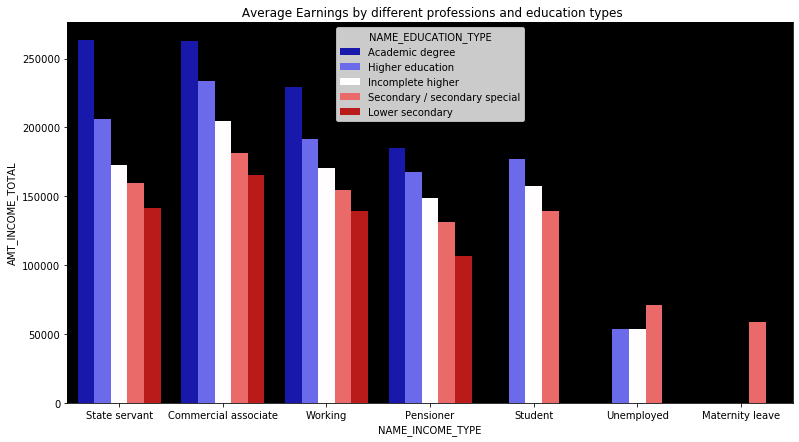

In [28]:
edu = combined_df.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(13,7))
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE',palette="seismic")
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types")
plt.show()


### Distribution of Education type by loan repayment status

NAME_FAMILY_STATUS - Family status of the client

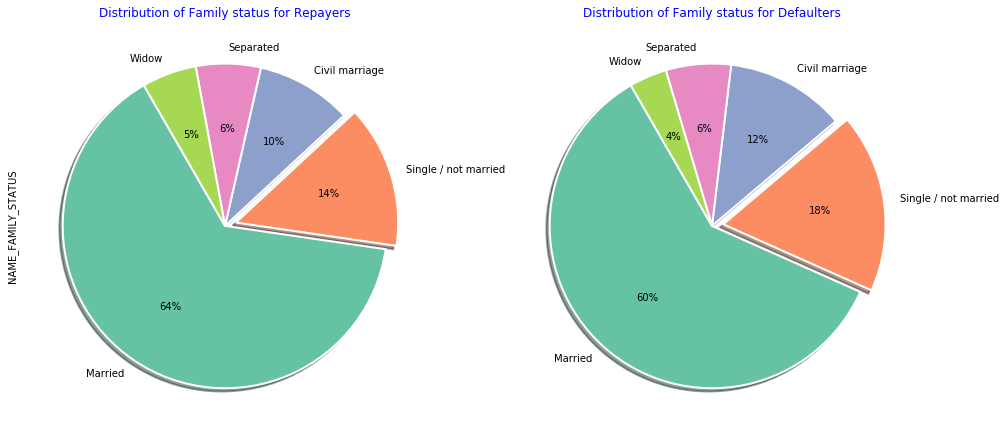

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(121)
combined_df[combined_df["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
combined_df[combined_df["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

### Point to infer from the graph

Percentage of single people are more in defaulters than non defaulters.


### Distribution of Housing type by loan repayment status

NAME_HOUSING_TYPE - What is the housing situation of the client (renting, living with parents, ...)

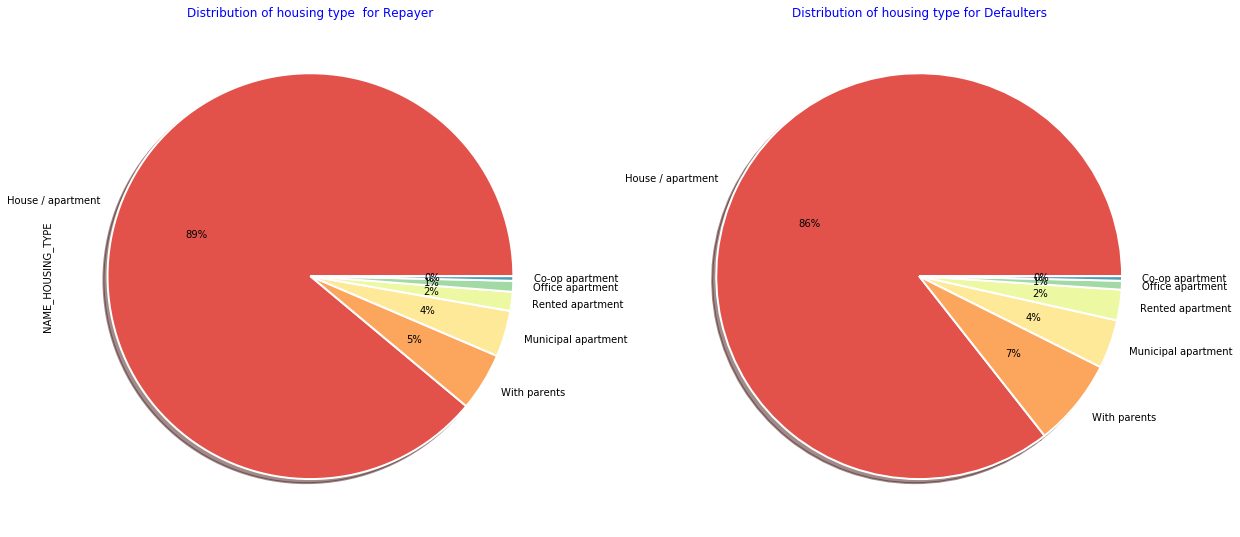

In [30]:
plt.figure(figsize=(20,20))
plt.subplot(121)
combined_df[combined_df["TARGET"]==0]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                             colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of housing type  for Repayer",color="b")

plt.subplot(122)
combined_df[combined_df["TARGET"]==1]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                    colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of housing type for Defaulters",color="b")
plt.ylabel("")
plt.show()


### Distribution normalized population of region where client lives by loan repayment status

REGION_POPULATION_RELATIVE - Normalized population of region where client lives (higher number means the client lives in more populated region).

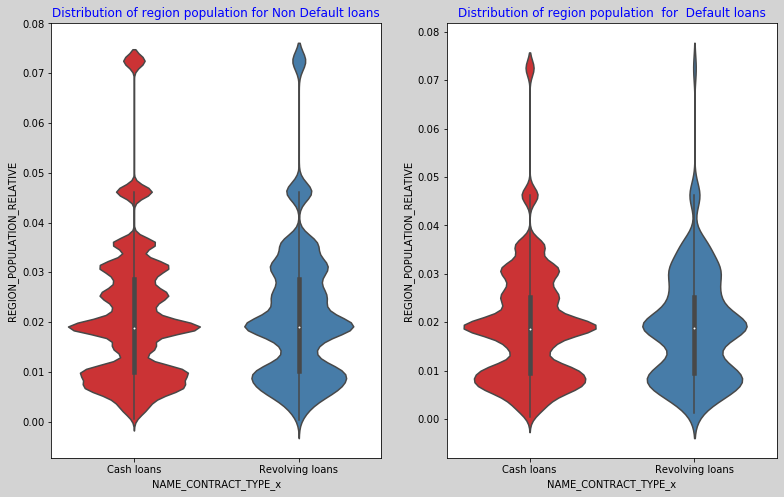

In [31]:
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.violinplot(y=combined_df[combined_df["TARGET"]==0]["REGION_POPULATION_RELATIVE"]
               ,x=combined_df[combined_df["TARGET"]==0]["NAME_CONTRACT_TYPE_x"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans",color="b")
plt.subplot(122)
sns.violinplot(y = combined_df[combined_df["TARGET"]==1]["REGION_POPULATION_RELATIVE"]
               ,x=combined_df[combined_df["TARGET"]==1]["NAME_CONTRACT_TYPE_x"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans",color="b")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")

### Point to infer from the graph

In High population density regions people are less likely to default on loans.


### Client's age

DAYS_BIRTH - Client's age in days at the time of application.

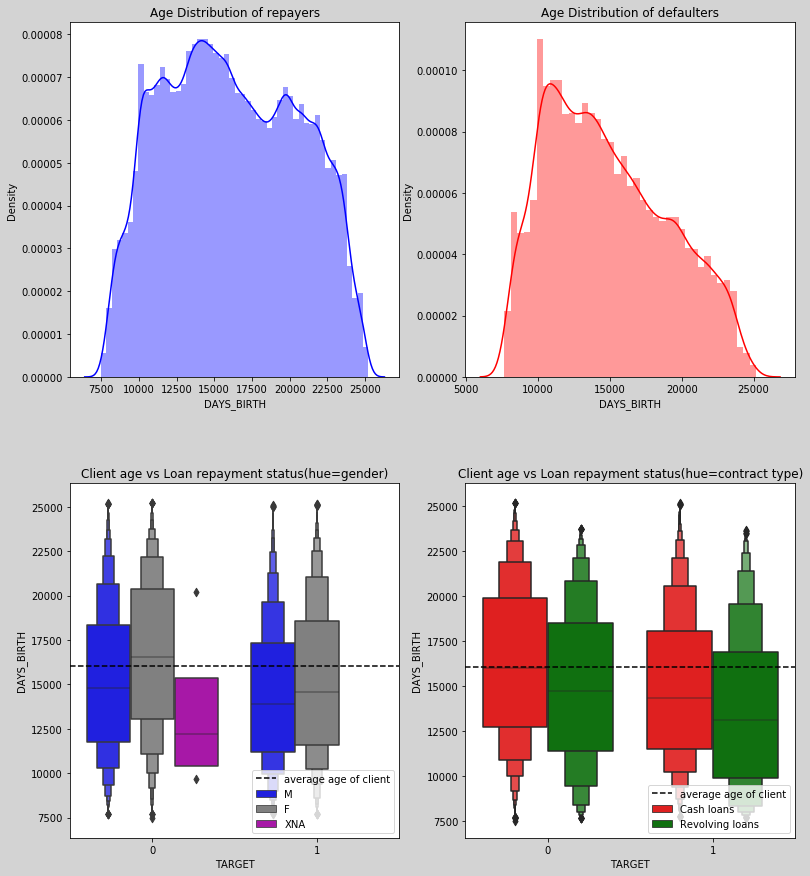

In [41]:
fig = plt.figure(figsize=(13,15))

plt.subplot(221)
sns.distplot(combined_df[combined_df["TARGET"]==0]["DAYS_BIRTH"],color="b")
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.distplot(combined_df[combined_df["TARGET"]==1]["DAYS_BIRTH"],color="r")
plt.title("Age Distribution of defaulters")

plt.subplot(223)
sns.boxenplot(combined_df["TARGET"],combined_df["DAYS_BIRTH"],hue=combined_df["CODE_GENDER"],palette=["b","grey","m"])
plt.axhline(combined_df["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=gender)")

plt.subplot(224)
sns.boxenplot(combined_df["TARGET"],combined_df["DAYS_BIRTH"],hue=combined_df["NAME_CONTRACT_TYPE_x"],palette=["r","g"])
plt.axhline(combined_df["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=contract type)")

plt.subplots_adjust(wspace = .2,hspace = .3)

fig.set_facecolor("lightgrey")

### Point to infer from the graph

Average clients age is comparatively less in non repayers than repayers in every aspect.

Younger people tend to default more than elder people.

### Distribution of days employed for target variable.

DAYS_EMPLOYED - How many days before the application for target variable the person started current employment

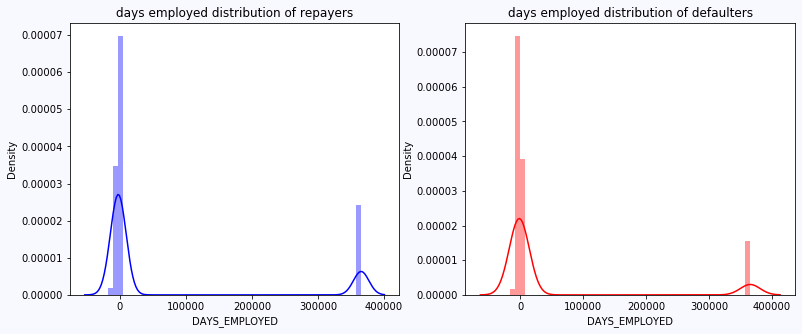

In [42]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(combined_df[combined_df["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(combined_df[combined_df["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

fig.set_facecolor("ghostwhite")

### Distribution of registration days for target variable.

DAYS_REGISTRATION How many days before the application did client change his registration

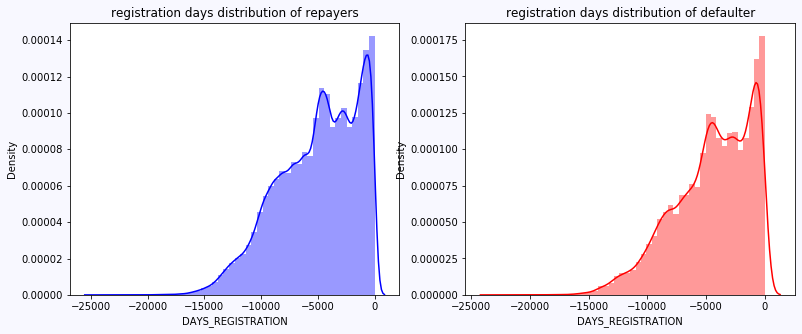

In [43]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(combined_df[combined_df["TARGET"]==0]["DAYS_REGISTRATION"],color="b")
plt.title("registration days distribution of repayers")

plt.subplot(122)
sns.distplot(combined_df[combined_df["TARGET"]==1]["DAYS_REGISTRATION"],color="r")
plt.title("registration days distribution of defaulter")

fig.set_facecolor("ghostwhite")

### Distribution in contact information provided by client

FLAG_MOBIL - Did client provide mobile phone (1=YES, 0=NO)

FLAG_EMP_PHONE - Did client provide work phone (1=YES, 0=NO)

FLAG_WORK_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_CONT_MOBILE - Was mobile phone reachable (1=YES, 0=NO)

FLAG_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_EMAIL - Did client provide email (1=YES, 0=NO)

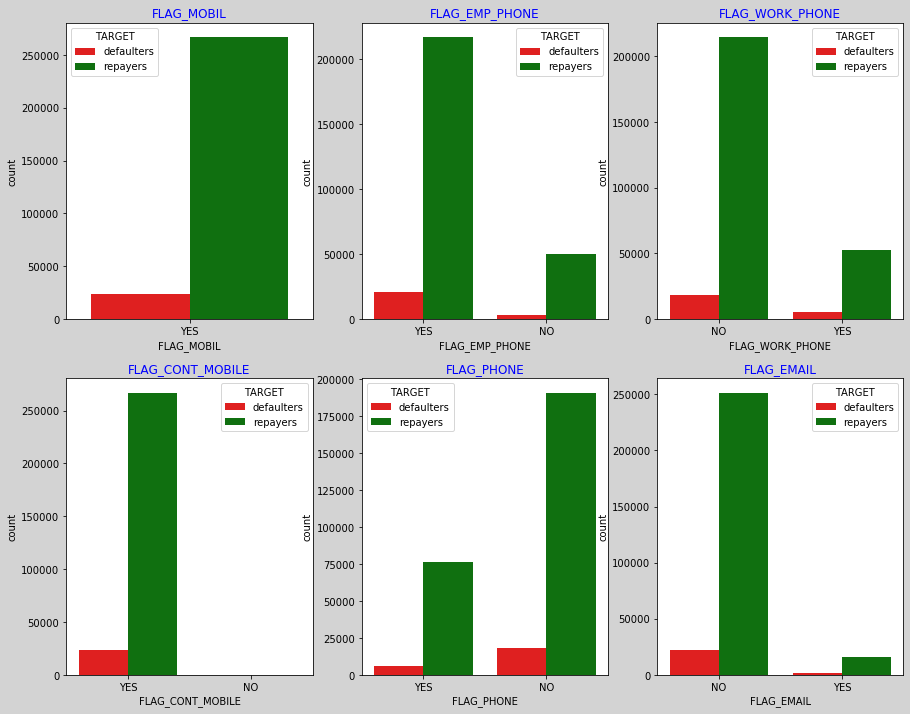

In [44]:
x   = combined_df[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL',"TARGET"]]
x["TARGET"] = x["TARGET"].replace({0:"repayers",1:"defaulters"})
x  = x.replace({1:"YES",0:"NO"})

cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
length = len(cols)

fig = plt.figure(figsize=(15,12))
fig.set_facecolor("lightgrey")

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,3,j+1)
    sns.countplot(x[i],hue=x["TARGET"],palette=["r","g"])
    plt.title(i,color="b")


### Distribution of registration days for target variable.

REGION_RATING_CLIENT - Home credit rating of the region where client lives (1,2,3).

REGION_RATING_CLIENT_W_CITY - Home credit rating of the region where client lives with taking city into account (1,2,3). Percentage of defaulters are less in 1-rated regions compared to repayers.

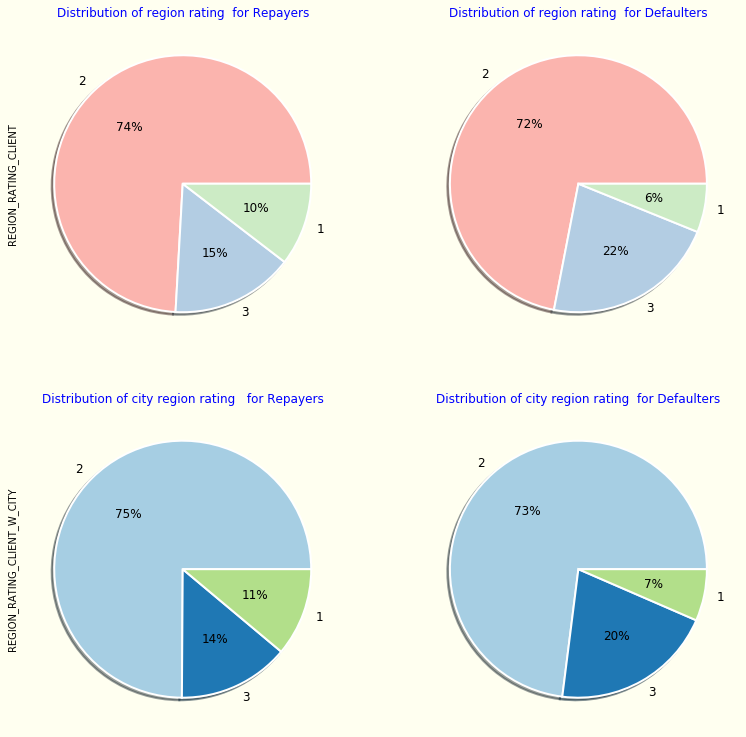

In [45]:
fig = plt.figure(figsize=(13,13))
plt.subplot(221)
combined_df[combined_df["TARGET"]==0]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of region rating  for Repayers",color="b")

plt.subplot(222)
combined_df[combined_df["TARGET"]==1]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of region rating  for Defaulters",color="b")
plt.ylabel("")

plt.subplot(223)
combined_df[combined_df["TARGET"]==0]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating   for Repayers",color="b")

plt.subplot(224)
combined_df[combined_df["TARGET"]==1]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of city region rating  for Defaulters",color="b")
plt.ylabel("")
fig.set_facecolor("ivory")

### Point to infer from the graph

Percentage of defaulters are less in 1-rated regions compared to repayers.

Percentage of defaulters are more in 3-rated regions compared to repayers.


### Distribution in organization types for repayers and defaulters

ORGANIZATION_TYPE - Type of organization where client works.

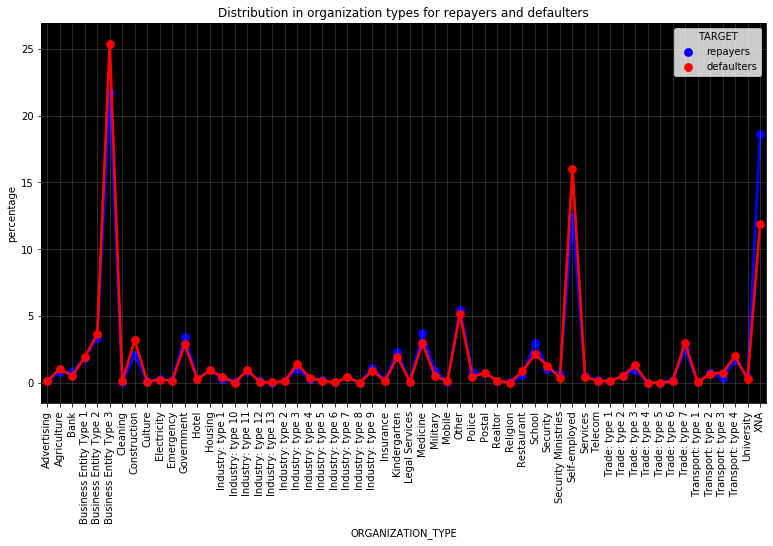

In [46]:
org = combined_df.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]
org_0["percentage"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
org_1["percentage"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

organization = pd.concat([org_0,org_1],axis=0)
organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})

organization
plt.figure(figsize=(13,7))
ax = sns.pointplot("ORGANIZATION_TYPE","percentage",
                   data=organization,hue="TARGET",palette=["b","r"])
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)
ax.set_facecolor("k")
ax.set_title("Distribution in organization types for repayers and defaulters")
plt.show()

### Point to infer from the graph

Organizations like Business Entity Type 3,Construction,Self-employed percentage of defaulters are higher than repayers.

### Distribution client's social surroundings with observed and defaulted 30 DPD (days past due)

OBS_30_CNT_SOCIAL_CIRCLE- How many observation of client's social surroundings with observable 30 DPD (days past due) default.

DEF_30_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings defaulted on 30 DPD (days past due) .

OBS_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 60 DPD (days past due) default.

DEF_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 (days past due) DPD.

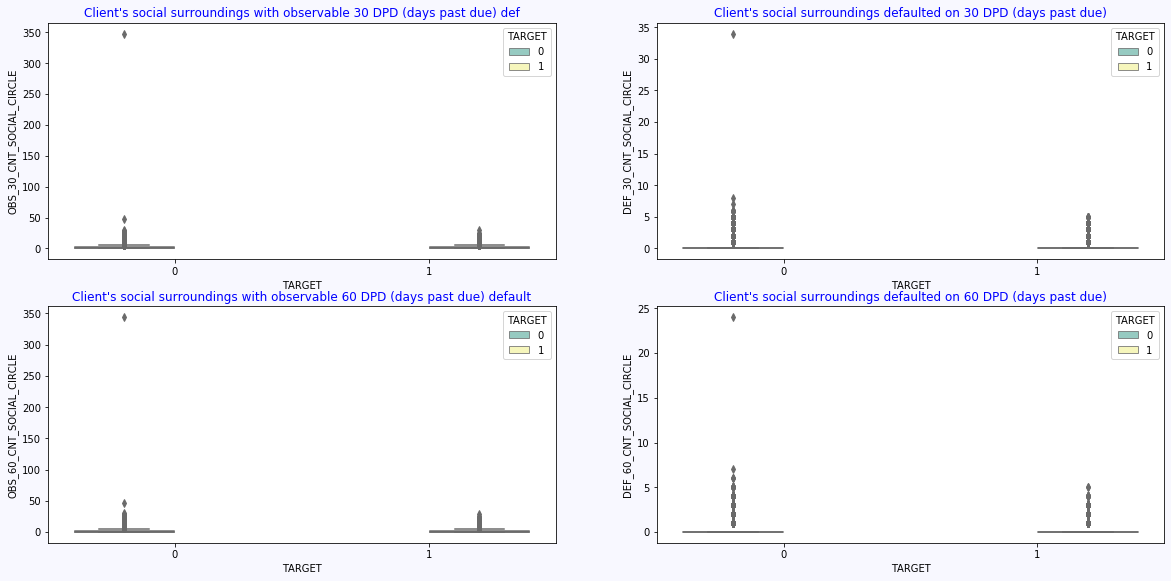

In [47]:
fig = plt.figure(figsize=(20,20))
plt.subplot(421)
sns.boxplot(data=combined_df,x='TARGET',y='OBS_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 30 DPD (days past due) def",color="b")
plt.subplot(422)
sns.boxplot(data=combined_df,x='TARGET',y='DEF_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 30 DPD (days past due)",color="b")
plt.subplot(423)
sns.boxplot(data=combined_df,x='TARGET',y='OBS_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 60 DPD (days past due) default",color="b")
plt.subplot(424)
sns.boxplot(data=combined_df,x='TARGET',y='DEF_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 60 DPD (days past due)",color="b")
fig.set_facecolor("ghostwhite")

### Number of days before application client changed phone .

DAYS_LAST_PHONE_CHANGE - How many days before application did client change phone.

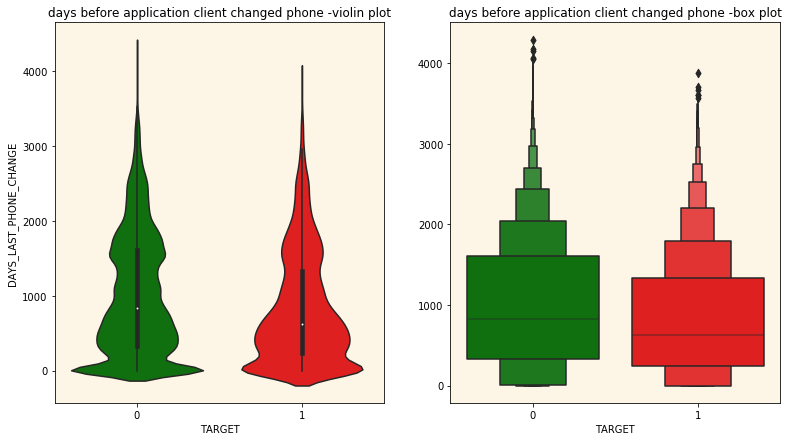

In [49]:
plt.figure(figsize=(13,7))
plt.subplot(121)
ax = sns.violinplot(combined_df["TARGET"],
                    combined_df["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax.set_facecolor("oldlace")
ax.set_title("days before application client changed phone -violin plot")
plt.subplot(122)
ax1 = sns.boxenplot(combined_df["TARGET"],
                 combined_df["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax1.set_facecolor("oldlace")
ax1.set_ylabel("")
ax1.set_title("days before application client changed phone -box plot")
plt.subplots_adjust(wspace = .2)

### Point to infer from the graph

Average days of defaulters phone change is less than average days of repayers phone change.

### Documents provided by the clients.

FLAG_DOCUMENT - Did client provide documents.(1,0)

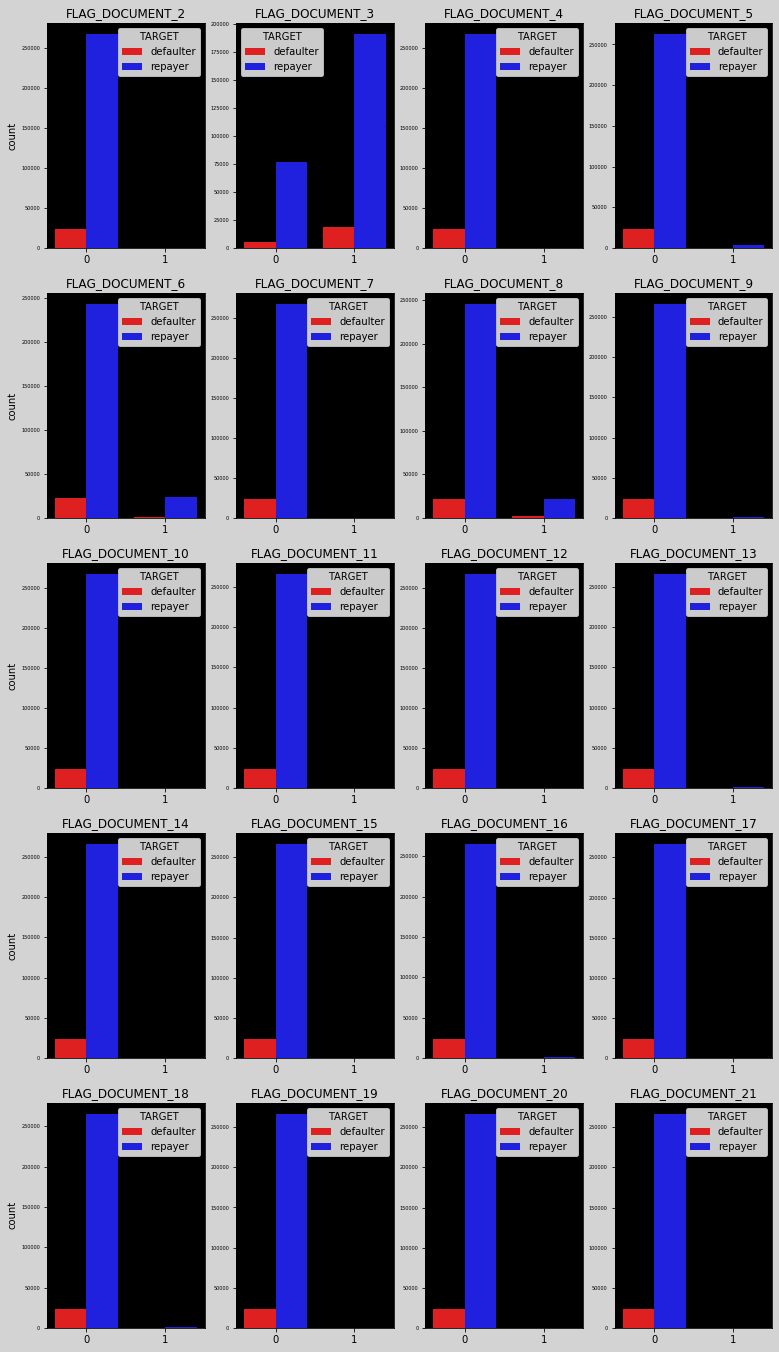

In [50]:
cols = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = combined_df[cols+["TARGET"]]

length = len(cols)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"defaulter",0:"repayer"})

fig = plt.figure(figsize=(13,24))
fig.set_facecolor("lightgrey")
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","b"])
    plt.yticks(fontsize=5)
    plt.xlabel("")
    plt.title(i)
    ax.set_facecolor("k")

### Equiries to Credit Bureau about the client before application.

AMT_REQ_CREDIT_BUREAU_HOUR - Number of enquiries to Credit Bureau about the client one hour before application.

AMT_REQ_CREDIT_BUREAU_DAY - Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application).

AMT_REQ_CREDIT_BUREAU_WEEK - Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application).

AMT_REQ_CREDIT_BUREAU_MON - Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application).

AMT_REQ_CREDIT_BUREAU_QRT - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application).

AMT_REQ_CREDIT_BUREAU_YEAR - Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application).

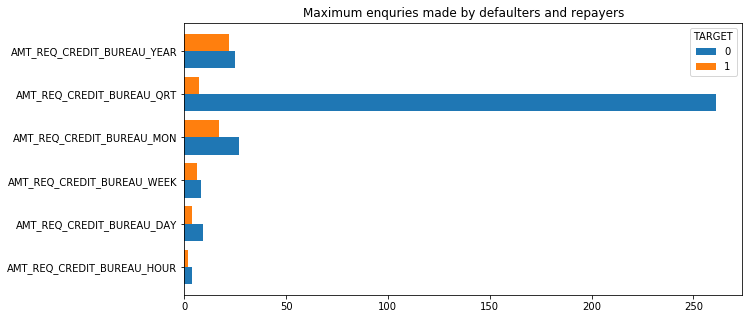

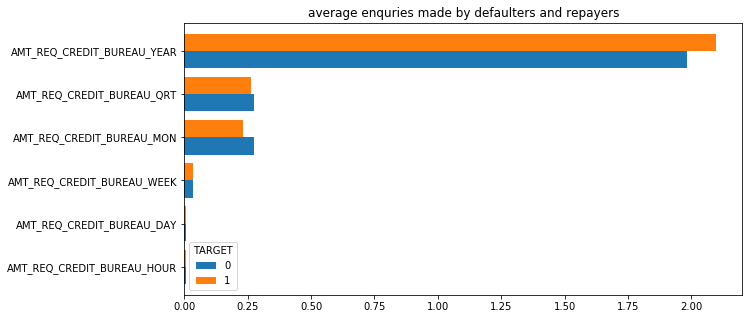

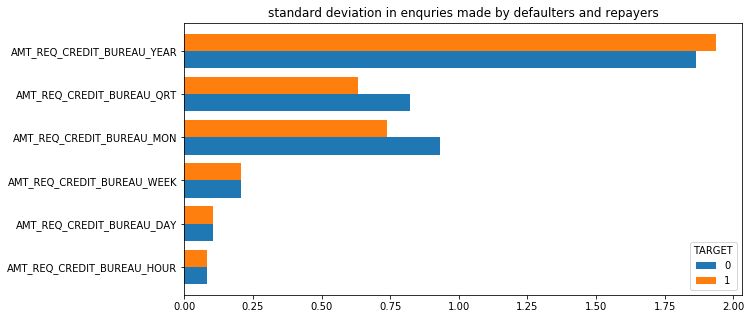

In [51]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
combined_df.groupby("TARGET")[cols].max().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("Maximum enquries made by defaulters and repayers")
combined_df.groupby("TARGET")[cols].mean().transpose().plot(kind="barh",
                                                                  figsize=(10,5),width=.8)
plt.title("average enquries made by defaulters and repayers")
combined_df.groupby("TARGET")[cols].std().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("standard deviation in enquries made by defaulters and repayers")
plt.show()


### Contract types collected from previous applications

NAME_CONTRACT_TYPE Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.


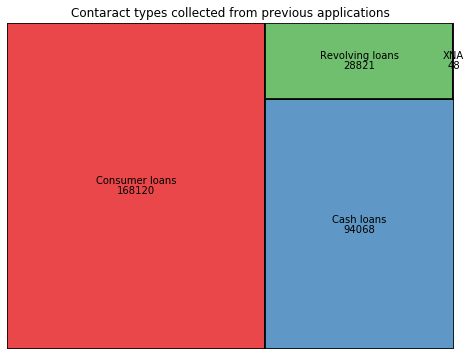

In [58]:
#!pip install squarify
cnts = combined_df["NAME_CONTRACT_TYPE_y"].value_counts()
import squarify
plt.figure(figsize=(8,6))
squarify.plot(cnts.values,label=cnts.keys(),value=cnts.values,linewidth=2,edgecolor="k",alpha=.8,color=sns.color_palette("Set1"))
plt.axis("off")
plt.title("Contaract types collected from previous applications")
plt.show()

### Point to infer from the graph


Consumer loan applications are maximum followed by cash loan applications in previous loan.

### Previous loan amounts applied and loan amounts credited.

AMT_APPLICATION-For how much credit did client ask on the previous application.

AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT.

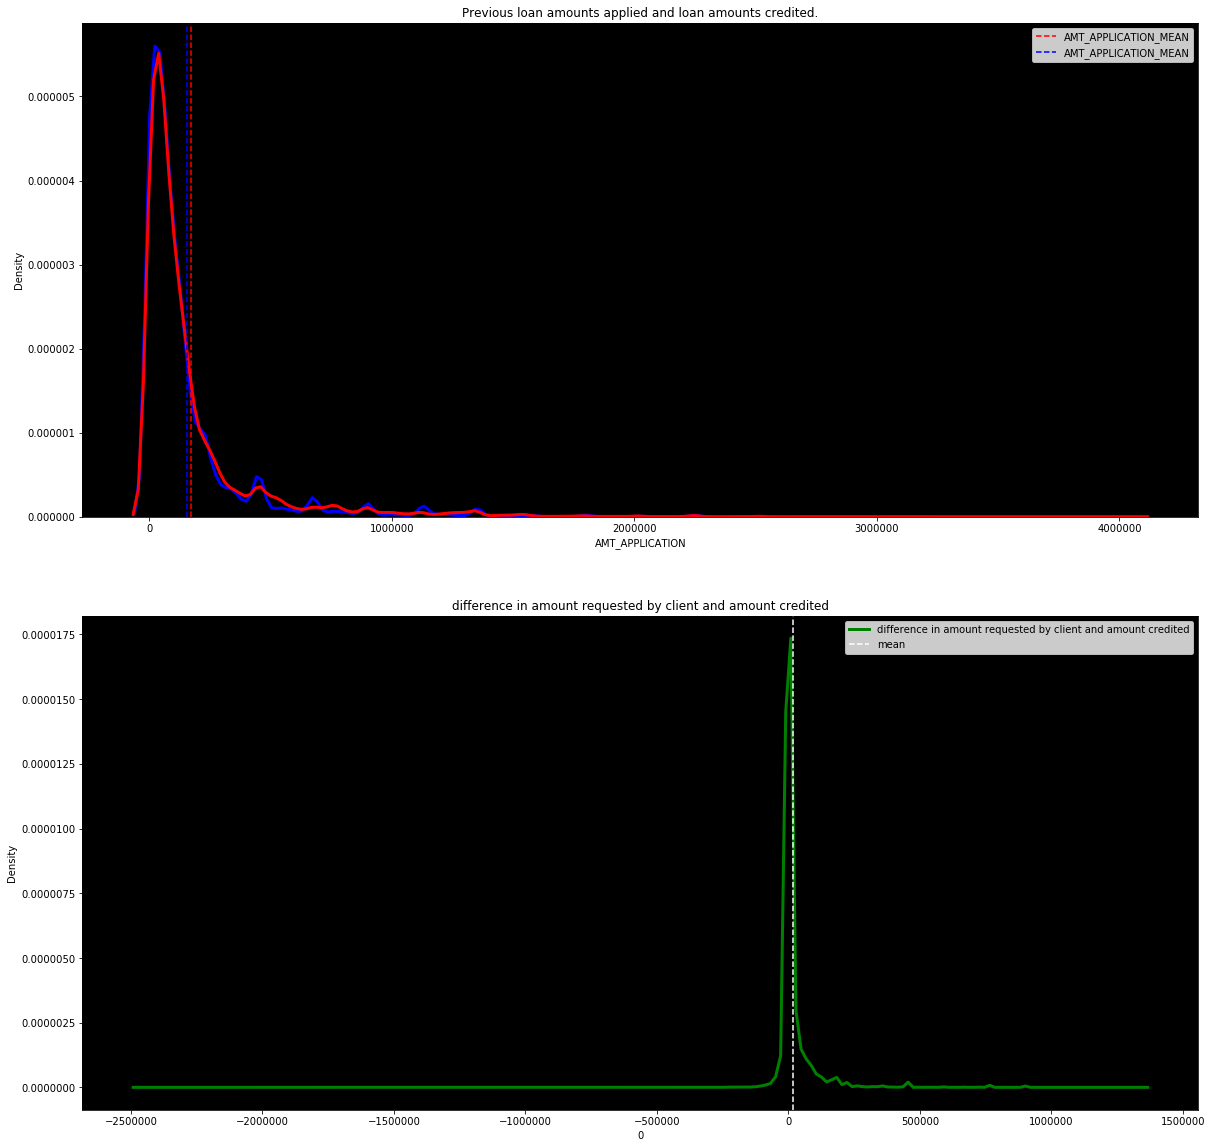

In [59]:
plt.figure(figsize=(20,20))
plt.subplot(211)
ax = sns.kdeplot(combined_df["AMT_APPLICATION"],color="b",linewidth=3)
ax = sns.kdeplot(combined_df[combined_df["AMT_CREDIT_y"].notnull()]["AMT_CREDIT_y"],color="r",linewidth=3)
plt.axvline(combined_df[combined_df["AMT_CREDIT_y"].notnull()]["AMT_CREDIT_y"].mean(),color="r",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.axvline(combined_df["AMT_APPLICATION"].mean(),color="b",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.legend(loc="best")
plt.title("Previous loan amounts applied and loan amounts credited.")
ax.set_facecolor("k")

plt.subplot(212)
diff = (combined_df["AMT_CREDIT_y"] - combined_df["AMT_APPLICATION"]).reset_index()
diff = diff[diff[0].notnull()]
ax1 = sns.kdeplot(diff[0],color="g",linewidth=3,label = "difference in amount requested by client and amount credited")
plt.axvline(diff[0].mean(),color="white",linestyle="dashed",label = "mean")
plt.title("difference in amount requested by client and amount credited")
ax1.legend(loc="best")
ax1.set_facecolor("k")

### Total and average amounts applied and credited in previous applications

AMT_APPLICATION-For how much credit did client ask on the previous application. >AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client.

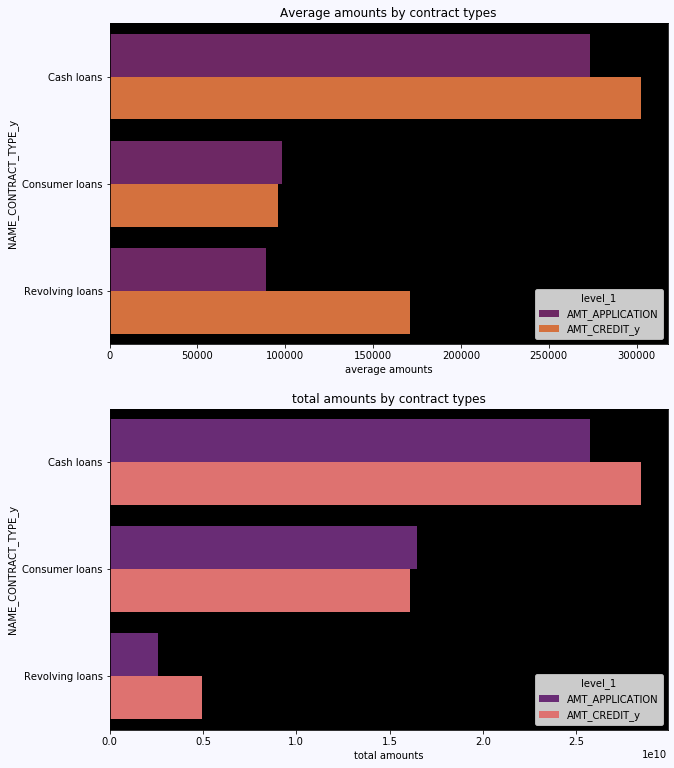

In [60]:
mn = combined_df.groupby("NAME_CONTRACT_TYPE_y")[["AMT_APPLICATION","AMT_CREDIT_y"]].mean().stack().reset_index()
tt = combined_df.groupby("NAME_CONTRACT_TYPE_y")[["AMT_APPLICATION","AMT_CREDIT_y"]].sum().stack().reset_index()
fig = plt.figure(figsize=(10,13))
fig.set_facecolor("ghostwhite")
plt.subplot(211)
ax = sns.barplot(0,"NAME_CONTRACT_TYPE_y",data=mn[:6],hue="level_1",palette="inferno")
ax.set_facecolor("k")
ax.set_xlabel("average amounts")
ax.set_title("Average amounts by contract types")

plt.subplot(212)
ax1 = sns.barplot(0,"NAME_CONTRACT_TYPE_y",data=tt[:6],hue="level_1",palette="magma")
ax1.set_facecolor("k")
ax1.set_xlabel("total amounts")
ax1.set_title("total amounts by contract types")
plt.subplots_adjust(hspace = .2)
plt.show()

### Annuity of previous application

AMT_ANNUITY - Annuity of previous application

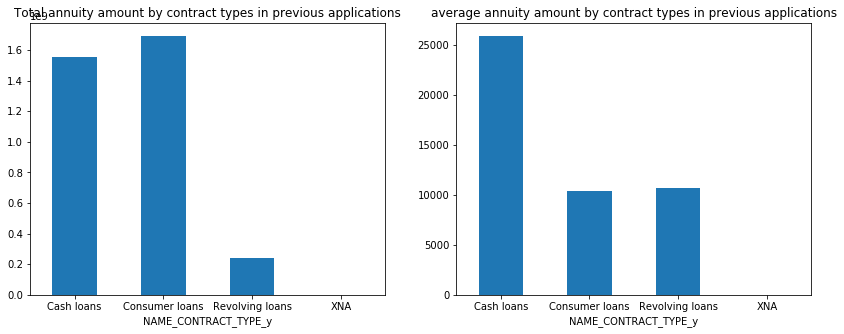

In [61]:
plt.figure(figsize=(14,5))
plt.subplot(121)
combined_df.groupby("NAME_CONTRACT_TYPE_y")["AMT_ANNUITY_y"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.subplot(122)
combined_df.groupby("NAME_CONTRACT_TYPE_y")["AMT_ANNUITY_y"].mean().plot(kind="bar")
plt.title("average annuity amount by contract types in previous applications")
plt.xticks(rotation=0)
plt.show()


### Count of application status by application type.

NAME_CONTRACT_TYPE -Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.

NAME_CONTRACT_STATUS -Contract status (approved, cancelled, ...) of previous application.

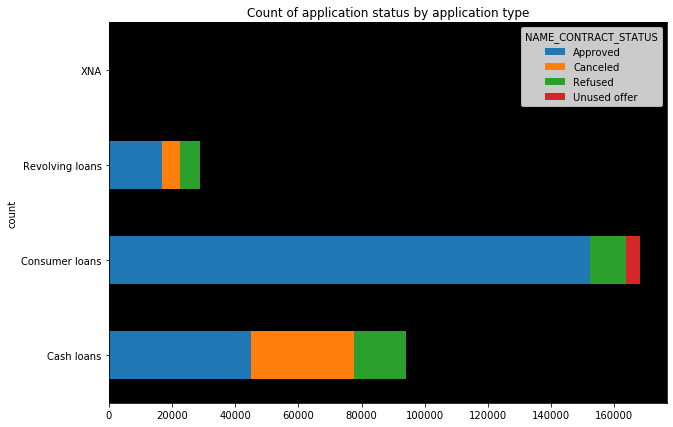

In [62]:
ax = pd.crosstab(combined_df["NAME_CONTRACT_TYPE_y"],combined_df["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

### Point to infer from the graph

Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.

### Contract status by weekdays

WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for previous application

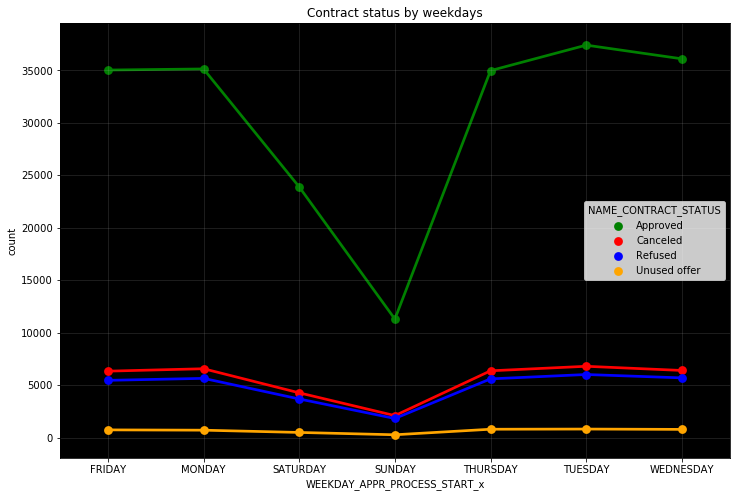

In [63]:
hr = pd.crosstab(combined_df["WEEKDAY_APPR_PROCESS_START_x"],combined_df["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["WEEKDAY_APPR_PROCESS_START_x"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Contract status by weekdays")
plt.grid(True,alpha=.2)

### Contract status by hour of the day

HOUR_APPR_PROCESS_START - Approximately at what day hour did the client apply for the previous application.



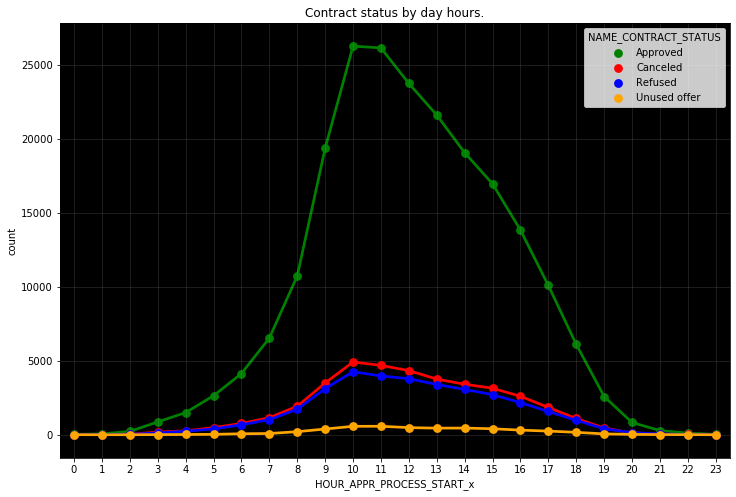

In [64]:
hr = pd.crosstab(combined_df["HOUR_APPR_PROCESS_START_x"],combined_df["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START_x"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Contract status by day hours.")
plt.grid(True,alpha=.2)

### Point to infer from the graph

Morning 10'o clock have maximum number of approvals.

Morning 10'o clock have maximum number of refused and cancelled contracts.

### Peak hours for week days for applying loans.

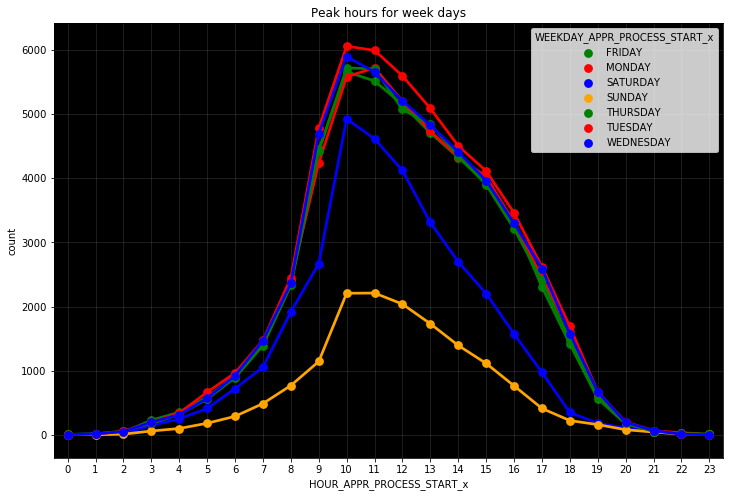

In [65]:
hr = pd.crosstab(combined_df["HOUR_APPR_PROCESS_START_x"],combined_df["WEEKDAY_APPR_PROCESS_START_x"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START_x"],hr[0],hue=hr["WEEKDAY_APPR_PROCESS_START_x"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Peak hours for week days")
plt.grid(True,alpha=.2)


### Percentage of applications accepted,cancelled,refused and unused for different loan purposes.

NAME_CASH_LOAN_PURPOSE - Purpose of the cash loan.

NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application.

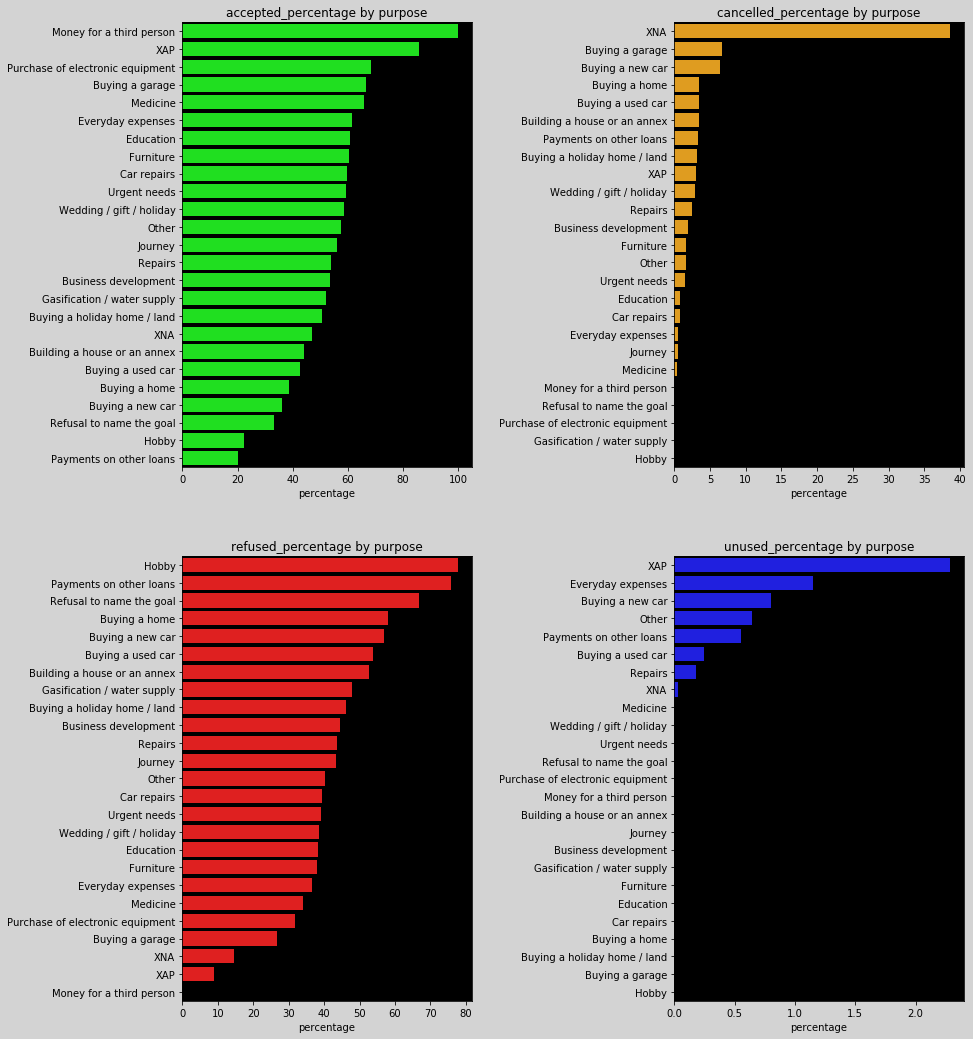

In [66]:
combined_df[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]
purpose = pd.crosstab(combined_df["NAME_CASH_LOAN_PURPOSE"],combined_df["NAME_CONTRACT_STATUS"])
purpose["a"] = (purpose["Approved"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["r"] = (purpose["Refused"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose_new = purpose[["a","c","r","u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({"a":"accepted_percentage","c":"cancelled_percentage",
                                                               "r":"refused_percentage","u":"unused_percentage"})

lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime","orange","r","b"]

fig = plt.figure(figsize=(14,18))
fig.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(lst,range(length),cs):
    plt.subplot(2,2,j+1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=dat.sort_values(by=0,ascending=False),color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" by purpose")
    plt.subplots_adjust(wspace = .7)
    ax.set_facecolor("k")

### Point to infer from the graph
Purposes like XAP ,electronic eqipment ,everey day expences and education have maximum loan acceptance.

Loan puposes like Hobby, payment of other loans ,refusal to name goal ,buying new home or car have most refusals.

37.5% of XNA purpose loans are cancalled.

### Contract status relative to decision made about previous application.

DAYS_DECISION - Relative to current application when was the decision about previous application made.



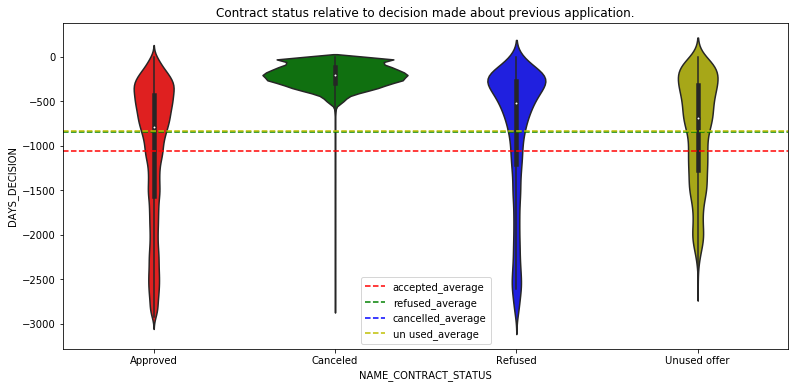

In [67]:
plt.figure(figsize=(13,6))
sns.violinplot(y= combined_df["DAYS_DECISION"],
               x = combined_df["NAME_CONTRACT_STATUS"],palette=["r","g","b","y"])
plt.axhline(combined_df[combined_df["NAME_CONTRACT_STATUS"] == "Approved"]["DAYS_DECISION"].mean(),
            color="r",linestyle="dashed",label="accepted_average")
plt.axhline(combined_df[combined_df["NAME_CONTRACT_STATUS"] == "Refused"]["DAYS_DECISION"].mean(),
            color="g",linestyle="dashed",label="refused_average")
plt.axhline(combined_df[combined_df["NAME_CONTRACT_STATUS"] == "Cancelled"]["DAYS_DECISION"].mean(),color="b",
            linestyle="dashed",label="cancelled_average")
plt.axhline(combined_df[combined_df["NAME_CONTRACT_STATUS"] == "Unused offer"]["DAYS_DECISION"].mean(),color="y",
            linestyle="dashed",label="un used_average")
plt.legend(loc="best")

plt.title("Contract status relative to decision made about previous application.")
plt.show()

### Point to infer from the graph

On average approved contract types have higher number of decision days compared to cancelled and refused contracts.



### Client payment methods & reasons for application rejections

NAME_PAYMENT_TYPE - Payment method that client chose to pay for the previous application.

CODE_REJECT_REASON - Why was the previous application rejected.



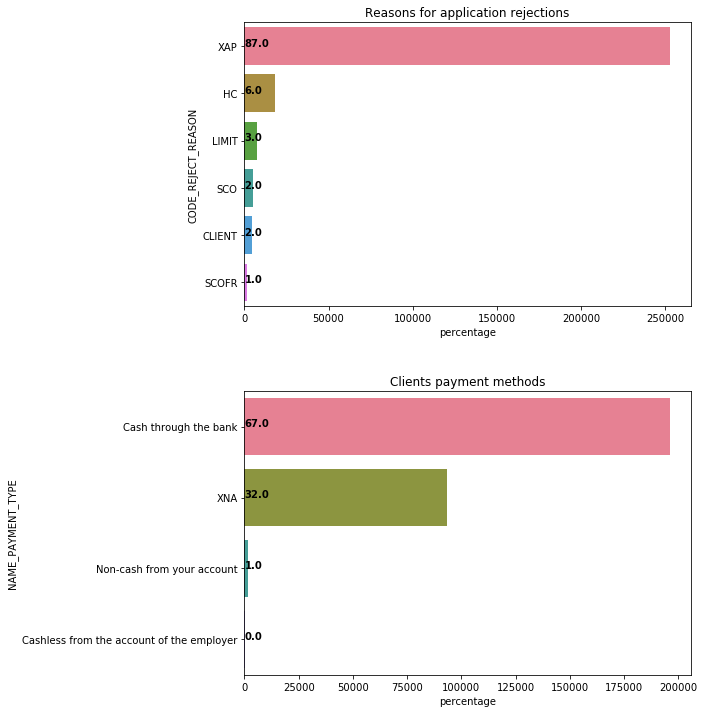

In [68]:
plt.figure(figsize=(8,12))
plt.subplot(211)
rej = combined_df["CODE_REJECT_REASON"].value_counts().reset_index()
ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6],palette="husl")
for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):
    ax.text(.7,i,j,weight="bold")
plt.xlabel("percentage")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")

plt.subplot(212)
pay = combined_df["NAME_PAYMENT_TYPE"].value_counts().reset_index()
ax1 = sns.barplot("NAME_PAYMENT_TYPE","index",data=pay,palette="husl")
for i,j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values*100/(pay["NAME_PAYMENT_TYPE"].sum())))):
    ax1.text(.7,i,j,weight="bold")
plt.xlabel("percentage")
plt.ylabel("NAME_PAYMENT_TYPE")
plt.title("Clients payment methods")
plt.subplots_adjust(hspace = .3)

### Point to infer from the graph

Around 87% of rejected applications the reason is XAP.

67% of chose to pay through cash by bank for previous applications.


#### Distribution in Client suite type & client type.

NAME_TYPE_SUITE - Who accompanied client when applying for the previous application.

NAME_CLIENT_TYPE - Was the client old or new client when applying for the previous application.



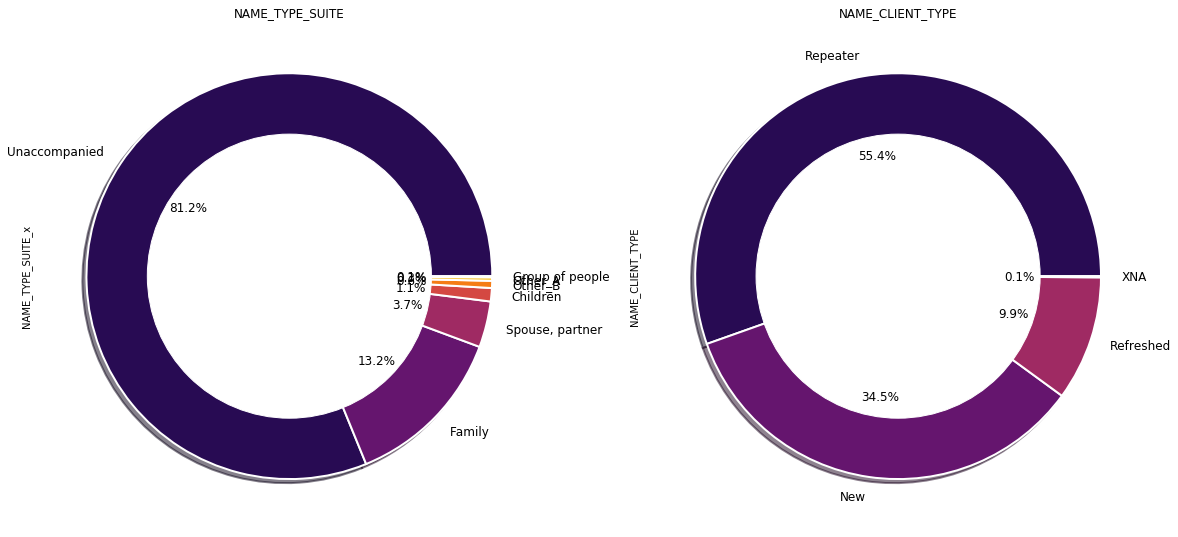

In [69]:
plt.figure(figsize=(20,20))
plt.subplot(121)
combined_df["NAME_TYPE_SUITE_x"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_TYPE_SUITE")

plt.subplot(122)
combined_df["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_CLIENT_TYPE")
plt.show()

### Point to infer from the graph
About 81.2% clients are un-accompained when applying for loans.

55.4% clients are old clients


## Popular goods for applying loans

NAME_GOODS_CATEGORY - What kind of goods did the client apply for in the previous application.


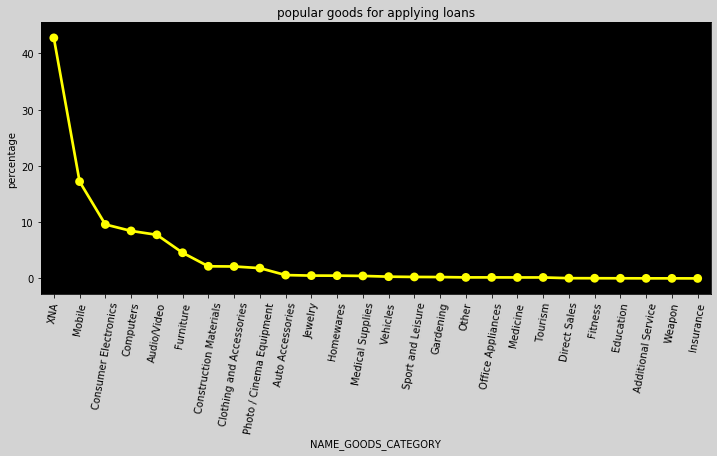

In [70]:
goods = combined_df["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5))
ax = sns.pointplot("index","percentage",data=goods,color="yellow")
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")
ax.set_facecolor("k")
fig.set_facecolor('lightgrey')




### Point to infer from the graph
XNA ,Mobiles ,Computers and consumer electronics are popular goods for applying loans

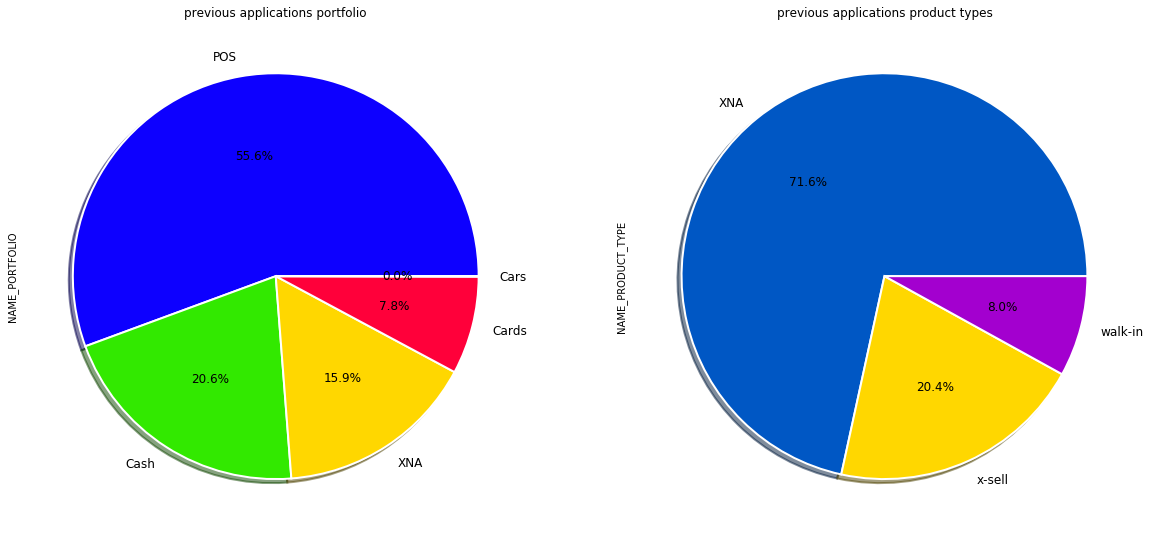

In [71]:
plt.figure(figsize=(20,20))
plt.subplot(121)
combined_df["NAME_PORTFOLIO"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",5),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                               shadow =True)
plt.title("previous applications portfolio")
plt.subplot(122)
combined_df["NAME_PRODUCT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",3),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                                  shadow =True)
plt.title("previous applications product types")
plt.show()


### Approval,canceled and refusal rates by channel types.

CHANNEL_TYPE - Through which channel we acquired the client on the previous application.

NAME_CONTRACT_STATUS- Contract status (approved, cancelled, ...) of previous application.



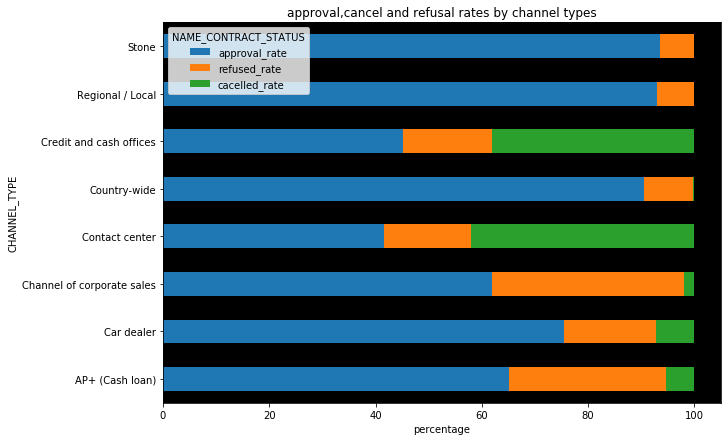

In [72]:
app = pd.crosstab(combined_df["CHANNEL_TYPE"],combined_df["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_facecolor("k")
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

### Point to infer from the graph

Channel types like Stone ,regional and country-wide have maximum approval rates.

Channel of coorporate sales have maximum refusal rate.

Credit-cash centres and Contact centres have maximum cancellation rates.

### Highest amount credited seller areas and industries.

SELLERPLACE_AREA - Selling area of seller place of the previous application.

NAME_SELLER_INDUSTRY - The industry of the seller.

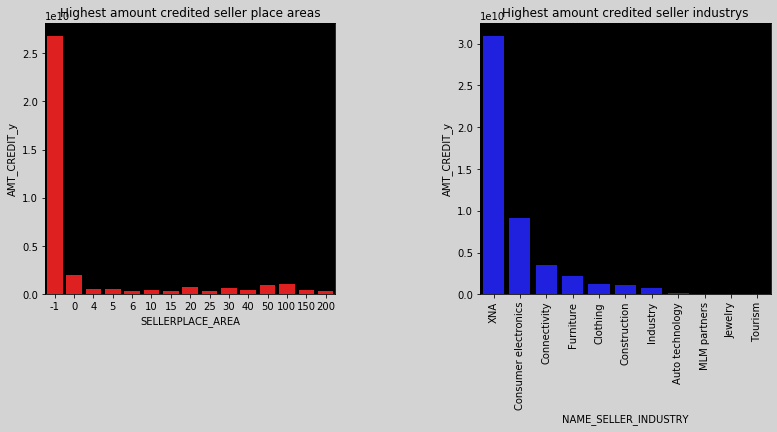

In [73]:
fig = plt.figure(figsize=(13,5))
plt.subplot(121)
are = combined_df.groupby("SELLERPLACE_AREA")["AMT_CREDIT_y"].sum().reset_index()
are = are.sort_values(by ="AMT_CREDIT_y",ascending = False)
ax = sns.barplot(y= "AMT_CREDIT_y",x ="SELLERPLACE_AREA",data=are[:15],color="r")
ax.set_facecolor("k")
ax.set_title("Highest amount credited seller place areas")

plt.subplot(122)
sell = combined_df.groupby("NAME_SELLER_INDUSTRY")["AMT_CREDIT_y"].sum().reset_index().sort_values(by = "AMT_CREDIT_y",ascending = False)
ax1=sns.barplot(y = "AMT_CREDIT_y",x = "NAME_SELLER_INDUSTRY",data=sell,color="b")
ax1.set_facecolor("k")
ax1.set_title("Highest amount credited seller industrys")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace = .5)
fig.set_facecolor("lightgrey")


### Popular terms of previous credit at application.

CNT_PAYMENT - Term of previous credit at application of the previous application.

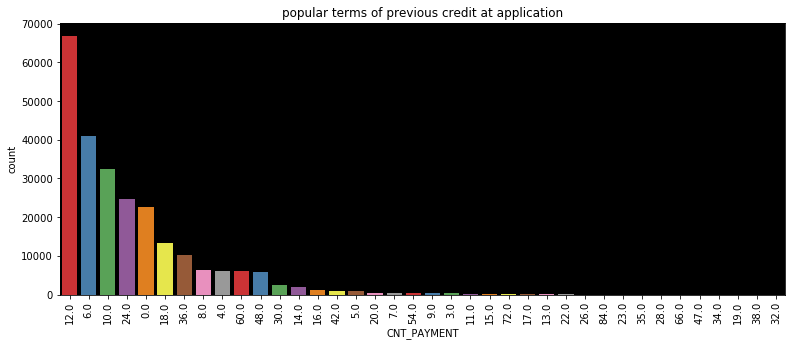

In [74]:
plt.figure(figsize=(13,5))
ax = sns.countplot(combined_df["CNT_PAYMENT"],palette="Set1",order=combined_df["CNT_PAYMENT"].value_counts().index)
ax.set_facecolor("k")
plt.xticks(rotation = 90)
plt.title("popular terms of previous credit at application")
plt.show()

### Point to infer from the graph

Popular term of previous credit are 6months ,10months ,1year ,2years & 3 years.

### Detailed product combination of the previous application

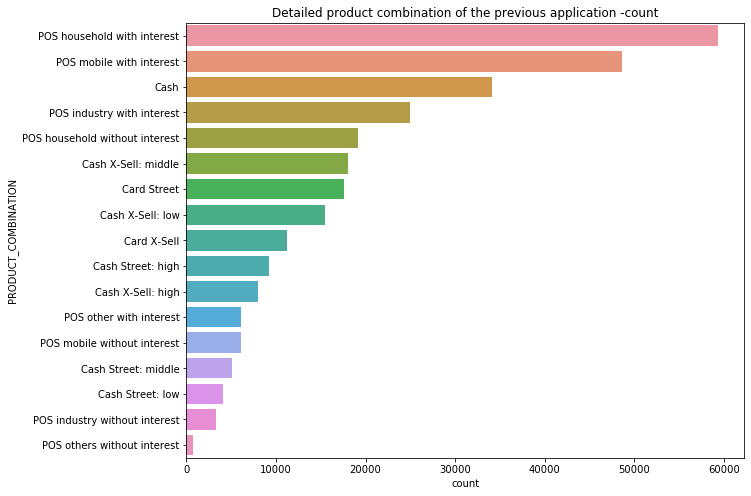

In [75]:
plt.figure(figsize=(10,8))
sns.countplot(y = combined_df["PRODUCT_COMBINATION"],order=combined_df["PRODUCT_COMBINATION"].value_counts().index)
plt.title("Detailed product combination of the previous application -count")
plt.show()


### Frequency distribution of intrest rates and client insurance requests

NAME_YIELD_GROUP - Grouped interest rate into small medium and high of the previous application.

NFLAG_INSURED_ON_APPROVAL - Did the client requested insurance during the previous application.

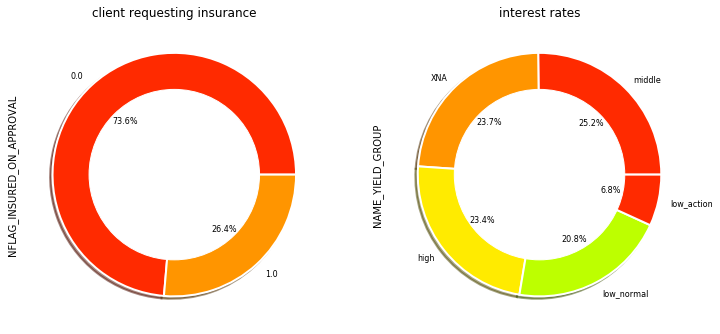

In [76]:
plt.figure(figsize=(12,6))
plt.subplot(121)
combined_df["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("client requesting insurance")

plt.subplot(122)
combined_df["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("interest rates")
plt.show()

### Days variables - Relative to application date of current application

DAYS_FIRST_DRAWING - Relative to application date of current application when was the first disbursement of the previous application.

DAYS_FIRST_DUE - Relative to application date of current application when was the first due supposed to be of the previous application.

DAYS_LAST_DUE_1ST_VERSION - Relative to application date of current application when was the first due of the previous application.

DAYS_LAST_DUE -Relative to application date of current application when was the last due date of the previous application.

DAYS_TERMINATION - Relative to application date of current application when was the expected termination of the previous application.

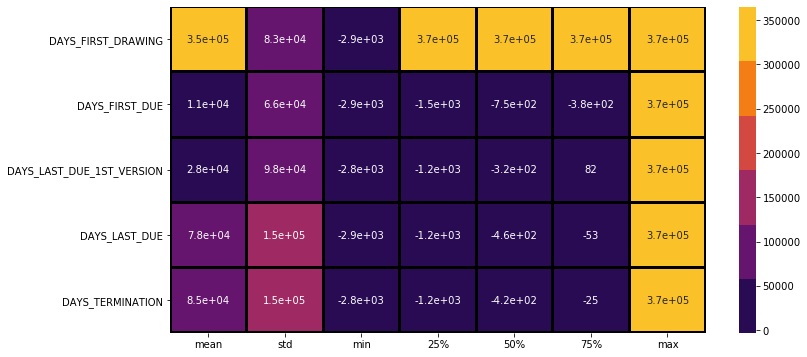

In [77]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(combined_df[cols].describe()[1:].transpose(),
            annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()


## Top 10 Correlation Fields for Repayer

In [78]:
df_repayer = combined_df[combined_df['TARGET'] == 0]
df_defaulter = combined_df[combined_df['TARGET'] == 1]

In [79]:
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
4786,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.00
2278,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
984,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
4787,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99
454,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.99
4711,AMT_CREDIT_y,AMT_APPLICATION,0.97
1519,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
5547,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
1352,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1823,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.87


In [80]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
4786,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.00
984,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
2278,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
4787,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99
454,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.98
4711,AMT_CREDIT_y,AMT_APPLICATION,0.97
1519,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
5547,DAYS_TERMINATION,DAYS_LAST_DUE,0.94
5394,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.90
1352,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
